In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import scipy as sp
import networkx as nx
import collections
import time
import math
import cProfile

### Uniform Spanning Tree

A spanning tree of a finite connected graph G is a connected subgraph of G containing every vertex and no cycles.  
(Ref: https://mathweb.ucsd.edu/~jschwein/LERW.pdf)

### Wilson's Algorithm

0. Create empty cells
1. Set the starting position
2. While it's not a spanning tree
    - Perform LERW in a network  
        1) Pick any random position  
        2) Perform a random walk  
        3) Check if the position is already visited  
            -- If yes, erase the loop and restart the walk
            -- If no, add to the trace
        4) Check if the current position is already in the trace

### Version 1.1

In [6]:
# Define a function to perform LERW

def LERW(start_position, goal, dim):
    
    visited_cell = []
    current_position = start_position
    visited_cell.append(current_position)
    while current_position != goal:
        neighbors = [(current_position[0],current_position[1]-1),(current_position[0],current_position[1]+1),
                     (current_position[0]-1,current_position[1]),(current_position[0]+1,current_position[1])] # (left,right,up,down)
        feasible_neighbors = [i for i in neighbors if (i[0] >= 0 and i[0] <= dim-1) and (i[1] >= 0 and i[1] <= dim-1)]
        next_position = random.choice(feasible_neighbors)
        # Check if there is a loop
        if next_position not in visited_cell:
            visited_cell.append(next_position)
        else:
            # reset path
            if visited_cell.index(next_position) == 0:
                visited_cell = [visited_cell[0]]
            else:
                visited_cell = visited_cell[:visited_cell.index(next_position)+1]

        current_position = next_position
    return start_position, goal, current_position, visited_cell

def cont_LERW(set_path, remaining_cell, dim):
    
    new_path = []
    new_start_position = random.choice(remaining_cell)
    current_position = new_start_position
    new_path.append(current_position)
    
    while current_position not in set_path:
        neighbors = [(current_position[0],current_position[1]-1),(current_position[0],current_position[1]+1),
                     (current_position[0]-1,current_position[1]),(current_position[0]+1,current_position[1])] # (left,right,up,down)
        feasible_neighbors = [i for i in neighbors if (i[0] >= 0 and i[0] <= dim-1) and (i[1] >= 0 and i[1] <= dim-1)]
        next_position = random.choice(feasible_neighbors)
        
        # Unprecedented path: add to the path
        if (next_position not in new_path) and (next_position not in set_path):
            new_path.append(next_position)
        
        # Adjoining path: add to the path and exit the loop
        if next_position in set_path:
            new_path.append(next_position)
            break
        
        # Loop detected: perform loop-erased RW
        if next_position in new_path:
            if new_path.index(next_position) == 0:
                new_path = [new_path[0]]
            else:
                new_path = new_path[:new_path.index(next_position)+1]
                
        # check if current_position is already in the path to goal.
        current_position = next_position
    return new_start_position, current_position, new_path

In [7]:
# Define a function sample_spanning_tree

def sample_spanning_tree(spMatrix):
    '''NOT DONE YET!
    REMAINING TASKS:
    1. Modify cont_LERW to correctly return the final result
    2. Return the sparse matrix representing network from the main function'''
    dim = spMatrix.getnnz()
    universe = [(i,j) for i in range(spMatrix.getnnz()) for j in range(spMatrix.getnnz())]
    start_position = random.choice(universe)
    universe.remove(start_position)
    goal = random.choice(universe)
    set_path = LERW(start_position, goal, dim)[3]
    
    # After obtaining the first path to the goal, generate the next RW until it's a spanning tree.
    remaining_cell = [i for i in universe if i not in set_path]
    while len(remaining_cell) > 0:
        add_path = cont_LERW(set_path, remaining_cell, dim)[2]
        set_path.extend(add_path)
        remaining_cell = [i for i in universe if i not in set_path]
    return set_path, remaining_cell, add_path

### Version 1.2

In [5]:
G = nx.MultiDiGraph()
G.add_edge(0, 1)
G.add_edge(0, 3)
G.add_edge(0, 4)
G.add_edge(1, 0)
G.add_edge(3, 0)
G.add_edge(4, 0)
G.add_edge(1, 4)
G.add_edge(1, 5)
G.add_edge(1, 2)
G.add_edge(4, 1)
G.add_edge(5, 1)
G.add_edge(2, 1)
G.add_edge(2, 4)
G.add_edge(2, 5)
G.add_edge(2, 6)
G.add_edge(4, 2)
G.add_edge(5, 2)
G.add_edge(6, 2)
G.add_edge(3, 4)
G.add_edge(4, 3)
G.add_edge(4, 5)
G.add_edge(5, 4)
G.add_edge(5, 6)
G.add_edge(6, 5)

G2 = nx.MultiDiGraph()
G2.add_edge(0,1)
G2.add_edge(1,0)
G2.add_edge(0,2)
G2.add_edge(2,0)
G2.add_edge(1,2)
G2.add_edge(2,1)

G3 = nx.MultiDiGraph()
G3.add_edge(0,1)
G3.add_edge(1,0)
G3.add_edge(0,2)
G3.add_edge(2,0)
G3.add_edge(0,3)
G3.add_edge(3,0)
G3.add_edge(1,2)
G3.add_edge(2,1)
G3.add_edge(1,3)
G3.add_edge(3,1)
G3.add_edge(2,3)
G3.add_edge(3,2)

G4 = nx.MultiDiGraph()
G4.add_edge(0,1)
G4.add_edge(1,0)
G4.add_edge(0,2)
G4.add_edge(2,0)
G4.add_edge(0,3)
G4.add_edge(3,0)
G4.add_edge(1,2)
G4.add_edge(2,1)
G4.add_edge(1,3)
G4.add_edge(3,1)
G4.add_edge(2,3)
G4.add_edge(3,2)
G4.add_edge(2,4)
G4.add_edge(4,2)
G4.add_edge(3,4)
G4.add_edge(4,3)

G5 = nx.MultiDiGraph()
G5.add_edge(0,1)
G5.add_edge(1,0)
G5.add_edge(0,2)
G5.add_edge(2,0)
G5.add_edge(1,7)
G5.add_edge(7,1)
G5.add_edge(7,5)
G5.add_edge(5,7)
G5.add_edge(5,6)
G5.add_edge(6,5)
G5.add_edge(6,4)
G5.add_edge(4,6)
G5.add_edge(4,2)
G5.add_edge(2,4)
G5.add_edge(1,2)
G5.add_edge(2,1)
G5.add_edge(1,3)
G5.add_edge(3,1)
G5.add_edge(3,5)
G5.add_edge(5,3)
G5.add_edge(5,4)
G5.add_edge(4,5)
G5.add_edge(5,2)
G5.add_edge(2,5)
G5.add_edge(2,3)
G5.add_edge(3,2)

A = nx.to_scipy_sparse_matrix(G4, nodelist=[0, 1, 2, 3, 4]) # 5 nodes
B = nx.to_scipy_sparse_matrix(G, nodelist=[0, 1, 2, 3, 4, 5, 6]) # 7 nodes
C = nx.to_scipy_sparse_matrix(G2, nodelist=[0, 1, 2]) # 3 nodes
D = nx.to_scipy_sparse_matrix(G3, nodelist=[0, 1, 2, 3]) # 4 nodes
E = nx.to_scipy_sparse_matrix(G5, nodelist=[0, 1, 2, 3, 4, 5, 6,7], format='coo') # 8 nodes

In [225]:
print(A.todense())
#print(B)

[[0 1 1 1 0]
 [1 0 1 1 0]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [0 0 1 1 0]]


In [10]:
print(B.todense())

[[0 1 0 1 1 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 0 1 1 1]
 [1 0 0 0 1 0 0]
 [1 1 1 1 0 1 0]
 [0 1 1 0 1 0 1]
 [0 0 1 0 0 1 0]]


In [11]:
A = nx.to_scipy_sparse_matrix(G, nodelist=[0, 1, 2, 3, 4])
num_nodes = A.shape[0]
A = A.todense()
universe_node_list = list(range(num_nodes))
unused_node_list = list(range(num_nodes))
visited_node = [False for node in range(num_nodes)]
output = [[0 for col in range(num_nodes)] for row in range(num_nodes)]
start_node = random.choice(unused_node_list)
unused_node_list.remove(start_node)
terminal_node = random.choice(unused_node_list)
unused_node_list.remove(terminal_node)
path = []
path.append(start_node)
selected_node[start_node] = True

NameError: name 'selected_node' is not defined

In [ ]:
(start_node, terminal_node)

In [ ]:
path

In [ ]:
print(start_node)
while visited_node[terminal_node] == False:
    feasible_node = []
    for j in range(num_nodes):
        if A[start_node, j] > 0: # This node pair is connected        
            feasible_node.append(j)
    next_node = random.choice(feasible_node)
    print(next_node)
    
    # Update a new initial node and add the edge to the graph
    visited_node[next_node] = True
    path.append(next_node)  
    start_node = next_node
    
    # If there's a loop, clear the loop (reset the path + work as if that path doesn't exist)
    if next_node in path:
        #output[start_node][next_node] = 0
        #output[next_node][start_node] = 0
        path = path[:path.index(next_node)+1]
        for i in path[path.index(next_node)+1:-1]: # Update selected node in the loop back to False
            selected_node[i] = False
            
# Update visited_node status after obtaining initial path           
for i in universe_node_list:
    if i in path:
        visited_node[i] = True
    else:
        visited_node[i] = False
        
# Update the output graph based on path result
pair = []
for i in range(len(path)-1):
    pair.append((path[i],path[i+1]))

for i in pair:
    output[i[0]][i[1]] = 1
    output[i[1]][i[0]] = 1

In [ ]:
path

In [ ]:
visited_node

In [ ]:
output

In [ ]:
[i for i in range(len(visited_node)) if visited_node[i] == False]

In [ ]:
# Continue picking a random remaining node and walk until we join the initial path

remaining_node = [i for i in range(len(visited_node)) if visited_node[i] == False]
add_path = []
while (False in visited_node):
    new_start_node = random.choice(remaining_node)
    visited_node[new_start_node] = True
    remaining_node.remove(new_start_node)
    print(new_start_node)
    if len(remaining_node) > 0:
        #new_next_node = random.choice(remaining_node)
        new_feasible_node = []
        for j in range(num_nodes):
            if A[new_start_node, j] > 0: # This node pair is connected        
                new_feasible_node.append(j)
        new_next_node = random.choice(new_feasible_node)
        print(new_next_node)
    # Walk until it joins the original path
    if new_next_node in path:
        visited_node[new_next_node] = True
        add_path.append((new_start_node, new_next_node))
        output[new_start_node][new_next_node] = 1
        output[new_next_node][new_start_node] = 1
    else: # not joining the original path yet: check for a loop
        if visited_node[new_next_node] and new_next_node in remaining_node:
            add_path = add_path[:add_path.index(new_next_node)+1]
            new_start_node = new_next_node
            continue
        else:
            visited_node[new_next_node] = True
            add_path.append((new_start_node, new_next_node))
            output[new_start_node][new_next_node] = 1
            output[new_next_node][new_start_node] = 1
            new_start_node = new_next_node

In [ ]:
visited_node

In [ ]:
add_path

In [ ]:
output

In [ ]:
for i in range(len(output)):
    for j in range(0+i, len(output)):
        if output[i][j] != 0:
            print("%d - %d: %d" % (i, j, output[i][j]))

### V1.3 Building the function

In [2]:
def output_update(pair, output):
    # Using pairs of nodes to generate output
    for i in pair:
        output[i[0]][i[1]] = 1
        output[i[1]][i[0]] = 1
    return output

In [3]:
def sample_spanning_tree(A):
    # Step 1: Function setup
    num_nodes = A.shape[0]
    mat_A = A.todense()
    universe_node_list = list(range(num_nodes))
    unused_node_list = list(range(num_nodes))
    visited_node = [False for node in range(num_nodes)]
    output_init = [[0 for col in range(num_nodes)] for row in range(num_nodes)]
    start_node = random.choice(unused_node_list)
    #print(start_node)
    unused_node_list.remove(start_node)
    terminal_node = random.choice(unused_node_list)
    unused_node_list.remove(terminal_node)
    path = []
    path.append(start_node)
    visited_node[start_node] = True
    
    # Step 2: Perform LERW and obtain the initial path
    while visited_node[terminal_node] == False:
        feasible_node = []
        for j in range(num_nodes):
            if mat_A[start_node, j] > 0: # This node pair is connected        
                feasible_node.append(j)
        next_node = random.choice(feasible_node)

        # Update a new initial node and add the edge to the graph
        visited_node[next_node] = True
        path.append(next_node)  
        start_node = next_node

        # If there's a loop, clear the loop (reset the path + work as if that path doesn't exist)
        if next_node in path:
            #output[start_node][next_node] = 0
            #output[next_node][start_node] = 0
            path = path[:path.index(next_node)+1]
            for i in path[path.index(next_node)+1:-1]: # Update selected node in the loop back to False
                visited_node[i] = False
                
    init_path = list.copy(path)
    # Update visited_node status after obtaining initial path           
    for i in universe_node_list:
        if i in init_path:
            visited_node[i] = True
        else:
            visited_node[i] = False

    # Update the output graph based on path result
    pair = []
    for i in range(len(init_path)-1):
        pair.append((init_path[i],init_path[i+1]))

    output = output_update(pair, output_init)
    
    # Step 3: Continue picking a random remaining node and walk to the initial path
    # until all nodes are visited.
    if set(path) == set(universe_node_list): # completely visited
        return output
    
    # Set up
    remaining_node = [i for i in range(len(visited_node)) if visited_node[i] == False]
    pair_path = []
    new_path = []
    temp_path = []
    is_connected = False
    
    while len(remaining_node) > 0 or is_connected == False:
        new_start_node = random.choice(remaining_node)
        #print(new_start_node)
        temp_path.append(new_start_node)
        new_feasible_node = []
        for k in range(num_nodes):
            if A[new_start_node, k] > 0: # This node pair is connected        
                new_feasible_node.append(k)
        new_next_node = random.choice(new_feasible_node)
        #print(new_next_node)

        if new_next_node in path:
            pair_path.append((new_start_node, new_next_node))
            path.extend(temp_path)
            #output[new_start_node][new_next_node] = 1
            #output[new_next_node][new_start_node] = 1
            remaining_node.remove(new_start_node)
            is_connected = True
            temp_path.clear()

        else:
            if new_next_node not in temp_path:
                if len(remaining_node) == 1: #this is the last node, and it should connect to node in path
                    new_start_node = new_next_node
                    new_feasible_node = []
                    for k in range(num_nodes):
                        if A[new_start_node, k] > 0: # This node pair is connected        
                            new_feasible_node.append(k)
                    new_next_node = random.choice(new_feasible_node)
                    temp_path = temp_path[:temp_path.index(new_next_node)+1]
                    path.extend(temp_path)
                    pair_path.append((new_start_node, new_next_node))
                    remaining_node.extend(loop)
                    break
                else:
                    temp_path.append(new_next_node)
                    remaining_node.remove(new_next_node)
            else: # This is a loop
                loop = temp_path[temp_path.index(new_next_node)+1:-1]
                temp_path = temp_path[:temp_path.index(new_next_node)+1]
                remaining_node.extend(loop)
                
    output = output_update(pair_path, output)  
    
    return output, init_path, pair_path, pair, remaining_node, sp.sparse.csr_matrix(output)

In [4]:
sample_spanning_tree(B)[5].todense()

NameError: name 'B' is not defined

In [ ]:
path = [3,4]
visited_node = [False,False,False,True,True]
num_nodes = len(visited_node)
remaining_node = [i for i in range(len(visited_node)) if visited_node[i] == False]
pair_path = []
new_path = []
temp_path = []
output = [[0 for col in range(num_nodes)] for row in range(num_nodes)]
is_connected = False

while len(remaining_node) > 0 or is_connected == False:
    new_start_node = random.choice(remaining_node)
    print(new_start_node)
    temp_path.append(new_start_node)
    new_feasible_node = []
    for k in range(num_nodes):
        if A[new_start_node, k] > 0: # This node pair is connected        
            new_feasible_node.append(k)
    new_next_node = random.choice(new_feasible_node)
    print(new_next_node)
    
    if new_next_node in path:
        pair_path.append((new_start_node, new_next_node))
        path.extend(temp_path)
        output[new_start_node][new_next_node] = 1
        output[new_next_node][new_start_node] = 1
        remaining_node.remove(new_start_node)
        is_connected = True
        temp_path.clear()

    else:
        if new_next_node not in temp_path:
            temp_path.append(new_next_node)
            remaining_node.remove(new_next_node)
        else: # This is a loop
            loop = temp_path[temp_path.index(new_next_node)+1:-1]
            temp_path = temp_path[:temp_path.index(new_next_node)+1]
            remaining_node.extend(loop)

output = 

In [ ]:
print("path = ", path)
print("remaining_node = ", remaining_node)
print("Is_connected = ", is_connected)
print("new_start_node = ", new_start_node)
print("new_next_node = ", new_next_node)
print("temp_path = ", temp_path)
print("new_path = ", new_path)
print("add_path = ", pair_path)
print("output = ", output)

### V1.4

In [2]:
def output_update_old(pair, output):
    # Using pairs of nodes to generate output
    for i in pair:
        output[i[0]][i[1]] = 1
        output[i[1]][i[0]] = 1
    return output

In [3]:
def sample_spanning_tree_old(A):
    # Step 1: Function setup
    num_nodes = A.shape[0]
    mat_A = A.todense()
    universe_node_list = list(range(num_nodes))
    unused_node_list = list(range(num_nodes))
    visited_node = [False for node in range(num_nodes)]
    output_init = [[0 for col in range(num_nodes)] for row in range(num_nodes)]
    start_node = random.choice(unused_node_list)
    #print(start_node)
    unused_node_list.remove(start_node)
    terminal_node = random.choice(unused_node_list)
    unused_node_list.remove(terminal_node)
    path = []
    path.append(start_node)
    visited_node[start_node] = True
    is_already_tree = False
    
    # Step 2: Perform LERW and obtain the initial path
    while visited_node[terminal_node] == False:
        feasible_node = []
        for j in range(num_nodes):
            if mat_A[start_node, j] > 0: # This node pair is connected        
                feasible_node.append(j)
        next_node = random.choice(feasible_node)

        # Update a new initial node and add the edge to the graph
        visited_node[next_node] = True
        path.append(next_node)  
        start_node = next_node

        # If there's a loop, clear the loop (reset the path + work as if that path doesn't exist)
        if next_node in path:
            #output[start_node][next_node] = 0
            #output[next_node][start_node] = 0
            path = path[:path.index(next_node)+1]
            for i in path[path.index(next_node)+1:-1]: # Update selected node in the loop back to False
                visited_node[i] = False
                
    init_path = list.copy(path)
    # Update visited_node status after obtaining initial path           
    for i in universe_node_list:
        if i in init_path:
            visited_node[i] = True
        else:
            visited_node[i] = False

    # Update the output graph based on path result
    pair = []
    for i in range(len(init_path)-1):
        pair.append((init_path[i],init_path[i+1]))

    output = output_update_old(pair, output_init)
    
    # Step 3: Continue picking a random remaining node and walk to the initial path
    # until all nodes are visited.
    if set(path) == set(universe_node_list): # completely visited
        #print("1st case")
        is_already_tree = True
        return output, sp.sparse.csr_matrix(output), pair
    #print(pair)
    # Set up
    remaining_node = [i for i in range(len(visited_node)) if visited_node[i] == False]
    pair_path = []
    new_path = []
    temp_path = []
    is_connected = False
    
    while len(remaining_node) > 0 or is_connected == False:
        if len(temp_path) == 0: # need to generate new node
            new_start_node = random.choice(remaining_node)
            #print(new_start_node)
            temp_path.append(new_start_node)
        new_feasible_node = []
        for k in range(num_nodes):
            if A[new_start_node, k] > 0: # This node pair is connected        
                new_feasible_node.append(k)
        new_next_node = random.choice(new_feasible_node)
        #print(new_next_node)

        if new_next_node in path:
            if len(temp_path) > 1: # for the case when walking more than 1 node and reach the path later
                for i in range(len(temp_path)-1):
                    pair_path.append((temp_path[i],temp_path[i+1]))
            pair_path.append((new_start_node, new_next_node))
            path.extend(temp_path)
            #output[new_start_node][new_next_node] = 1
            #output[new_next_node][new_start_node] = 1
            remaining_node = [node for node in remaining_node if node not in temp_path]
            is_connected = True
            temp_path.clear()

        else:
            if new_next_node not in temp_path:
                if len(remaining_node) == 1: #this is the last node, and it should connect to node in path
                    new_start_node = new_next_node
                    new_feasible_node = []
                    for k in range(num_nodes):
                        if A[new_start_node, k] > 0: # This node pair is connected        
                            new_feasible_node.append(k)
                    new_next_node = random.choice(new_feasible_node)
                    temp_path = temp_path[:temp_path.index(new_next_node)+1]
                    path.extend(temp_path)
                    pair_path.append((new_start_node, new_next_node))
                    remaining_node.extend(loop)
                    break
                else:
                    temp_path.append(new_next_node)
                    #remaining_node.remove(new_next_node)
                    new_start_node = new_next_node
            else: # This is a loop
                loop = temp_path[temp_path.index(new_next_node)+1:-1]
                temp_path = temp_path[:temp_path.index(new_next_node)+1]
                remaining_node.extend(loop)
                new_start_node = new_next_node
                
    output = output_update_old(pair_path, output)  
    #print("2nd case")
    return output, sp.sparse.csr_matrix(output)#, init_path, pair, pair_path, path

In [21]:
x = sample_spanning_tree(B)

In [22]:
y = sample_spanning_tree(B)

In [23]:
#print(x[0])
print(x[1]) 
print("\n")
print(y[1])

  (0, 3)	1
  (0, 4)	1
  (1, 2)	1
  (2, 1)	1
  (2, 4)	1
  (2, 6)	1
  (3, 0)	1
  (4, 0)	1
  (4, 2)	1
  (4, 5)	1
  (5, 4)	1
  (6, 2)	1


  (0, 1)	1
  (1, 0)	1
  (1, 5)	1
  (2, 4)	1
  (2, 6)	1
  (3, 4)	1
  (4, 2)	1
  (4, 3)	1
  (5, 1)	1
  (5, 6)	1
  (6, 2)	1
  (6, 5)	1


### Spanning tree validation

In [24]:
sample_spanning_tree(A)

([[0, 0, 1, 1, 1],
  [0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 1, 0, 0, 0]],
 <5x5 sparse matrix of type '<class 'numpy.intc'>'
 	with 8 stored elements in Compressed Sparse Row format>,
 [1, 4],
 [(1, 4)],
 [(2, 0), (0, 4), (3, 0)],
 [1, 4, 2, 0, 3])

In [ ]:
for i in spanning_tree:
    print(i)
    print('\n')

In [ ]:
spanning_tree = [sample_spanning_tree(C)[0] for j in range(100)]

In [ ]:
spanning_tree

In [ ]:
nx.from_scipy_sparse_matrix(sample_spanning_tree(C)[1])

In [ ]:
testlist = [1,2,3,4]
testmat = [ [[1,2,3],[4,5,6]] , [[1,2,3],[5,4,6]] ]
testdict = {}

for i in testmat:
    for j in range(len(i)):
        i[j] = tuple(i[j])
    
for i in range(len(testmat)):
    testmat[i] = tuple(testmat[i]) 

In [ ]:
for i in testmat:
    testdict[i] = testdict.get(i,0) + 1

In [ ]:
for i in testdict:
    print(i)
    print(testdict.get(i))

In [ ]:
tree_count = {}

for i in spanning_tree:
    for j in range(len(i)):
        i[j] = tuple(i[j])
    
for i in range(len(spanning_tree)):
    spanning_tree[i] = tuple(spanning_tree[i]) 
    
for i in spanning_tree:
    tree_count[i] = tree_count.get(i,0) + 1

In [ ]:
tree_count

In [ ]:
prob_list = []
n_total = 0
for i in tree_count:
    n_total += tree_count.get(i)
    
for i in tree_count:
    prob_list.append(tree_count.get(i)/n_total)

prob_list

In [4]:
def spanning_tree_probability_old(graph, ntimes):
    spanning_tree = [sample_spanning_tree_old(graph)[0] for j in range(ntimes)]
    
    # Firstly, transform the sparse matrix to immutable object (tuple), so it'll be hashable    
    for i in spanning_tree:
        for j in range(len(i)):
            i[j] = tuple(i[j])

    for i in range(len(spanning_tree)):
        spanning_tree[i] = tuple(spanning_tree[i]) 
    
    # Then, count how many different spanning trees are generated
    tree_count = {}
    for i in spanning_tree:
        tree_count[i] = tree_count.get(i,0) + 1
        
    # Finally, calculate the probability
    prob_list = []
    n_total = 0
    for i in tree_count:
        n_total += tree_count.get(i)

    for i in tree_count:
        prob_list.append(tree_count.get(i)/n_total)
    
    possible_tree = (graph.shape[0])**(graph.shape[0]-2)
    prob_diff = np.array(prob_list) - np.array(graph.shape[0]*(1/possible_tree) )
    return tree_count, prob_list, abs(prob_diff)

In [ ]:
A = nx.to_scipy_sparse_matrix(G4, nodelist=[0, 1, 2, 3, 4]) # 5 nodes
B = nx.to_scipy_sparse_matrix(G, nodelist=[0, 1, 2, 3, 4, 5, 6]) # 7 nodes
C = nx.to_scipy_sparse_matrix(G2, nodelist=[0, 1, 2]) # 3 nodes
D = nx.to_scipy_sparse_matrix(G3, nodelist=[0, 1, 2, 3]) # 4 nodes
E = nx.to_scipy_sparse_matrix(G5, nodelist=[0, 1, 2, 3, 4, 5, 6,7], format='coo') # 8 nodes

In [7]:
spanning_tree_probability_old(D,1000)[0]

{((0, 1, 0, 0), (1, 0, 1, 1), (0, 1, 0, 0), (0, 1, 0, 0)): 51,
 ((0, 1, 1, 0), (1, 0, 0, 1), (1, 0, 0, 0), (0, 1, 0, 0)): 76,
 ((0, 1, 0, 0), (1, 0, 1, 0), (0, 1, 0, 1), (0, 0, 1, 0)): 79,
 ((0, 1, 1, 0), (1, 0, 0, 0), (1, 0, 0, 1), (0, 0, 1, 0)): 54,
 ((0, 0, 1, 0), (0, 0, 0, 1), (1, 0, 0, 1), (0, 1, 1, 0)): 65,
 ((0, 0, 1, 1), (0, 0, 1, 0), (1, 1, 0, 0), (1, 0, 0, 0)): 66,
 ((0, 1, 0, 0), (1, 0, 0, 1), (0, 0, 0, 1), (0, 1, 1, 0)): 58,
 ((0, 1, 1, 1), (1, 0, 0, 0), (1, 0, 0, 0), (1, 0, 0, 0)): 61,
 ((0, 0, 0, 1), (0, 0, 1, 1), (0, 1, 0, 0), (1, 1, 0, 0)): 64,
 ((0, 1, 0, 1), (1, 0, 0, 0), (0, 0, 0, 1), (1, 0, 1, 0)): 52,
 ((0, 0, 1, 0), (0, 0, 1, 1), (1, 1, 0, 0), (0, 1, 0, 0)): 59,
 ((0, 1, 0, 1), (1, 0, 1, 0), (0, 1, 0, 0), (1, 0, 0, 0)): 56,
 ((0, 0, 0, 1), (0, 0, 0, 1), (0, 0, 0, 1), (1, 1, 1, 0)): 61,
 ((0, 0, 1, 0), (0, 0, 1, 0), (1, 1, 0, 1), (0, 0, 1, 0)): 77,
 ((0, 0, 1, 1), (0, 0, 0, 1), (1, 0, 0, 0), (1, 1, 0, 0)): 64,
 ((0, 0, 0, 1), (0, 0, 1, 0), (0, 1, 0, 1), (1, 0, 1, 0

In [159]:
# Test for 3,4, and 5 nodes graph
start = time.time()
print(spanning_tree_probability(C, 10000)[1]) # 3 nodes
print(spanning_tree_probability(D, 50000)[1]) # 4 nodes
print(spanning_tree_probability(A, 50000)[1]) # 5 nodes
end = time.time()
print(end-start, " secs")

[0.329, 0.3372, 0.3338]
[0.06008, 0.06368, 0.06344, 0.06342, 0.06198, 0.06336, 0.06286, 0.06264, 0.06138, 0.06152, 0.06098, 0.0621, 0.06202, 0.06352, 0.06464, 0.06238]
[0.00802, 0.00818, 0.00832, 0.00842, 0.00826, 0.00832, 0.00818, 0.0079, 0.00806, 0.00828, 0.00738, 0.0074, 0.00872, 0.00828, 0.00866, 0.00846, 0.00816, 0.00788, 0.00764, 0.00796, 0.00866, 0.00786, 0.0083, 0.0086, 0.00846, 0.00798, 0.008, 0.0078, 0.00746, 0.00766, 0.0079, 0.00802, 0.00788, 0.00772, 0.00764, 0.00756, 0.00802, 0.00738, 0.00838, 0.00766, 0.00772, 0.00786, 0.00782, 0.0086, 0.00786, 0.00774, 0.0083, 0.00758, 0.00814, 0.00796, 0.0079, 0.00878, 0.00808, 0.00792, 0.00758, 0.00834, 0.00838, 0.00876, 0.0073, 0.00764, 0.00814, 0.00712, 0.00782, 0.00746, 0.0079, 0.00858, 0.00822, 0.0084, 0.00766, 0.0076, 0.0079, 0.00748, 0.00774, 0.00758, 0.00802, 0.00826, 0.00752, 0.0081, 0.00816, 0.0085, 0.00786, 0.0081, 0.00762, 0.0073, 0.00808, 0.00774, 0.0081, 0.00898, 0.00808, 0.00746, 0.00764, 0.00812, 0.0078, 0.00828, 0.0079,

In [ ]:
print(spanning_tree_probability(nx.to_scipy_sparse_matrix(nx.complete_graph(20)), 10000)[1]) # 20 nodes

3 nodes graph: $3^{3-2} = 3$ possible spanning trees. Each different tree has probability of 1/3.

4 nodes graph: $4^{4-2} = 4^2 = 16$ possible spanning trees. Each different tree has probability of 1/16.

5 nodes graph: $5^{5-2} = 5^3 = 125$ possible spanning trees. Each different tree has probability of 1/125.

7 nodes graph: $7^{7-2} = 7^5 = 16807$ possible spanning trees. Each different tree has probability of 1/16807.

### Degrees of vertices

In [ ]:
tree = sample_spanning_tree(nx.to_scipy_sparse_matrix(nx.complete_graph(21)))

In [ ]:
tree

In [ ]:
tree[0]

In [ ]:
degrees = []

for i in tree[0]:
    degrees.append(sum(i))

degrees_seq = sorted(degrees)
degrees_seq

In [ ]:
deg_counter = collections.Counter(degrees_seq)
deg_counter

In [ ]:
pmf_dict = {}

for i in deg_counter:
    pmf_dict[i] = round(deg_counter.get(i)/len(degrees_seq), 4)

pmf = list(pmf_dict.values())
cdf = np.cumsum(pmf)

In [ ]:
print(pmf)
print(cdf)

In [ ]:
# PMF plot

plt.plot(list(set(degrees_seq)), pmf, marker="o")

In [ ]:
# CDF plot

plt.plot(list(set(degrees_seq)), cdf, marker="o")

In [ ]:
# Generate a lot of independent spanning tree

cdf_mat = []

for _ in range(100):
    sample_tree = sample_spanning_tree(nx.to_scipy_sparse_matrix(nx.complete_graph(21)))
    
    # Create a degree vector that collects degree from each node
    degrees = []
    for i in sample_tree[0]:
        degrees.append(sum(i))
    degrees_seq = sorted(degrees)
    deg_counter = collections.Counter(degrees_seq) # Count the number of times for each degree
    pmf_dict = {}

    for i in deg_counter:
        pmf_dict[i] = round(deg_counter.get(i)/len(degrees_seq), 4)
    pmf = list(pmf_dict.values())
    cdf = np.cumsum(pmf)
    cdf_mat.append(cdf)

In [ ]:
cdf_mat

In [ ]:
cdf_i = []
for i in cdf_mat:
    cdf_i.append(i[2])

In [ ]:
cdf_mat = np.array(cdf_mat)

cdf_mat[0]

### Script test 7/8/2022
#### Degree CDF plot

In [5]:
def degree_cdf(g, n):
    '''To calculate the degree of all vertices of a tree, take a look at the CDF of the degrees, aggregating over all
    randomly-generated spanning trees'''
    cdf_mat = []
    
    # Generate n spanning tree from the original graph, g.
    for _ in range(n):
        sample_tree = sample_spanning_tree(g)[0]
        
        # For each tree, compute degrees and sort them.
        degrees = []
        for i in sample_tree:
            degrees.append(sum(i))
        degrees_seq = sorted(degrees)
        deg_counter = collections.Counter(degrees_seq) # Count the number of times for each degree
        
        # Look at how PMF and CDF of the degrees looks, collect all degree CDF from individual spanning tree.
        pmf_dict = {}

        for i in deg_counter:
            pmf_dict[i] = round(deg_counter.get(i)/len(degrees_seq), 3)
        pmf = list(pmf_dict.values())
        cdf = np.cumsum(pmf)
        cdf_mat.append(cdf)
        
    return cdf_mat

In [6]:
g = nx.to_scipy_sparse_matrix(nx.complete_graph(21))

def avg_deg_cdf(g, ntrees):
    res = []
    for i in degree_cdf(g, ntrees):
        for j in range(len(i)):
            res.append((j+1, i[j]))

    ## Calculate the average of each CDF with distinct index (key)        
    avg_res = {}
    for key, val in res:
        avg_res.setdefault(key, []).append(val) # If there is a key, do nothing. If not, append new value into blank list

    for i in avg_res:
        avg_res[i] = round(np.average(avg_res[i]), 4)
        # Modify some value
        if avg_res[i] > 1.0:
            avg_res[i] = 1.0   

    return avg_res

In [360]:
avg_res = avg_deg_freq(g, 100)

fig, ax = plt.subplots()

for i in degree_freq_cdf(g,100):
    ax.plot(np.arange(len(i))+1, i, marker="o")
    for j in range(len(list(avg_res.values()))):
        y_mean = [list(avg_res.values())[j]]*len(list(avg_res.values()))
        ax.plot(list(avg_res), y_mean, linestyle="--")

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [42]:
avg_res

{1: 0.3948, 2: 0.7729, 3: 0.9395, 4: 0.9945, 5: 1.0}

### Script test 7/15/2022
#### Performance test

In [7]:
# Requirement: Create the same plot but showing the histogram of the degree distribution instead of the CDF

g = nx.to_scipy_sparse_matrix(nx.complete_graph(21))
avg_res = avg_deg_cdf(g, 100)

In [357]:
def degree_freq_cdf(g, n):
    '''To calculate the degree of all vertices of a tree, take a look at the CDF of the degrees, aggregating over all
    randomly-generated spanning trees'''
    cdf_mat = []
    #deg_feq = []
    
    # Generate n spanning tree from the original graph, g.
    for _ in range(n):
        sample_tree = sample_spanning_tree(g)[0]
        
        # For each tree, compute degrees and sort them.
        degrees = [sum(i) for i in sample_tree]
        degrees_seq = sorted(degrees)
        deg_counter = collections.Counter(degrees_seq) # Count the number of times for each degree
        #deg_feq.append(deg_counter)
        
        # Look at how PMF and CDF of the degrees looks, collect all degree CDF from individual spanning tree.
        pmf_dict = {}

        for i in range(1, max(deg_counter)+1):
            pmf_dict[i] = round(deg_counter.get(i, 0)/len(degrees_seq), 3) # If there's no specific num of node, use zero.
        pmf = list(pmf_dict.values())
        cdf = np.cumsum(pmf)
        cdf_mat.append(cdf)
        
    return cdf_mat, degrees_seq

In [42]:
start = time.time()

x = degree_freq_cdf(nx.to_scipy_sparse_matrix(nx.complete_graph(2000)),100)

end = time.time()
print("Total execution time = ", end-start)

KeyboardInterrupt: 

In [359]:
def avg_deg_freq(g, ntrees):
    res = []
    x = degree_freq_cdf(g, ntrees)[0] # [0] indicates degree frequency after generating random spanning trees

    for i in x: # 
        for j in range(max(i)): # use max index key due to some degree-skipped sample
            if i.get(j+1) == None:
                res.append((j+1, 0))
            else:
                res.append((j+1, i.get(j+1)))

    avg_res = {}
    for key, val in res:
        #avg_res[key] = avg_res.get(key, 0) + val
        avg_res.setdefault(key, []).append(val)        

    for i in avg_res:
        avg_res[i] = round(np.average(avg_res[i]), 4)

    return avg_res, x

[Counter({2: 9, 1: 8, 3: 2, 4: 2}), Counter({2: 12, 1: 6, 3: 2, 4: 1}), Counter({2: 10, 1: 7, 3: 3, 4: 1}), Counter({1: 9, 2: 7, 3: 4, 5: 1}), Counter({1: 10, 2: 5, 3: 4, 4: 2}), Counter({1: 8, 2: 8, 3: 4, 4: 1}), Counter({1: 9, 2: 6, 3: 5, 4: 1}), Counter({1: 8, 2: 7, 3: 6}), Counter({2: 9, 1: 7, 3: 5}), Counter({1: 9, 2: 7, 3: 3, 4: 2})]


[array([0.381, 0.81 , 0.905, 1.   ]), array([0.286, 0.857, 0.952, 1.   ]), array([0.333, 0.809, 0.952, 1.   ]), array([0.429, 0.762, 0.952, 0.952, 1.   ]), array([0.476, 0.714, 0.904, 0.999]), array([0.381, 0.762, 0.952, 1.   ]), array([0.429, 0.715, 0.953, 1.001]), array([0.381, 0.714, 1.   ]), array([0.333, 0.762, 1.   ]), array([0.429, 0.762, 0.905, 1.   ])]


[(1, 8), (2, 9), (3, 2), (4, 2), (1, 6), (2, 12), (3, 2), (4, 1), (1, 7), (2, 10), (3, 3), (4, 1), (1, 9), (2, 7), (3, 4), (4, 0), (5, 1), (1, 10), (2, 5), (3, 4), (4, 2), (1, 8), (2, 8), (3, 4), (4, 1), (1, 9), (2, 6), (3, 5), (4, 1), (1, 8), (2, 7), (3, 6), (1, 7), (2, 9), (3, 5), (1, 9)

In [35]:
avg_deg_freq(g,10)

{1: 7.9, 2: 8.4, 3: 3.8, 4: 1.1667, 5: 0.5, 6: 1.0}

### Script test 7/18/2022

#### Histogram plot

In [35]:
g21 = nx.to_scipy_sparse_matrix(nx.complete_graph(21))
g100 = nx.to_scipy_sparse_matrix(nx.complete_graph(100))
g2000 = nx.to_scipy_sparse_matrix(nx.complete_graph(2000))

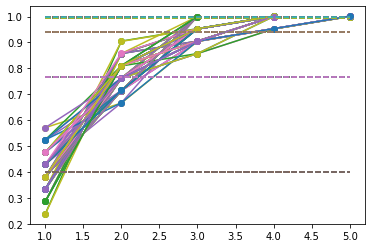

In [11]:
avg_res = avg_deg_cdf(g21, 100)

fig, ax = plt.subplots()

for i in degree_cdf(g,100):
    ax.plot(np.arange(len(i))+1, i, marker="o")
    for j in range(len(list(avg_res.values()))):
        y_mean = [list(avg_res.values())[j]]*len(list(avg_res.values()))
        ax.plot(list(avg_res), y_mean, linestyle="--")

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4]


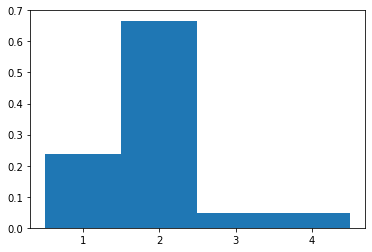

Total execution time =  0.2451338768005371


In [12]:
start = time.time()
x = degree_freq_cdf(g21,20)[2] # degrees_seq as a horizontal axis
bin_edges = np.arange(0.5, max(x)+1, 1)
print(x)
plt.hist(x, bins = bin_edges, density = True)
plt.xticks(np.arange(1, max(x)+1, 1))
plt.show()
end = time.time()
total_time = end-start
print("Total execution time = ", total_time)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4]


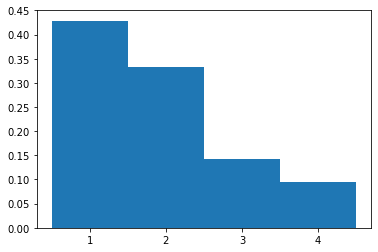

Total execution time =  0.4007148742675781


In [40]:
start = time.time()
x = degree_freq_cdf(g21,50)[2] # degrees_seq as a horizontal axis
bin_edges = np.arange(0.5, max(x)+1, 1)
print(x)
plt.hist(x, bins = bin_edges, density = True)
plt.xticks(np.arange(1, max(x)+1, 1))
plt.show()
end = time.time()
total_time = end-start
print("Total execution time = ", total_time)

[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3]


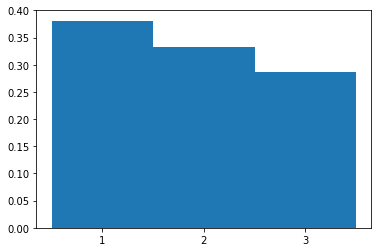

Total execution time =  0.7781276702880859


In [13]:
start = time.time()
x = degree_freq_cdf(g21,100)[2] # degrees_seq as a horizontal axis
bin_edges = np.arange(0.5, max(x)+1, 1)
print(x)
plt.hist(x, bins = bin_edges, density = True)
plt.xticks(np.arange(1, max(x)+1, 1))
plt.show()
end = time.time()
total_time = end-start
print("Total execution time = ", total_time)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 5]


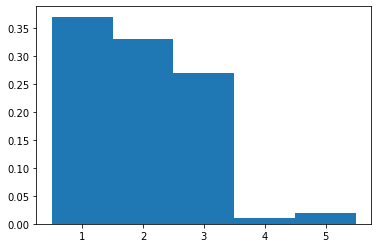

Total execution time =  3.389981985092163


In [14]:
start = time.time()
x = degree_freq_cdf(g100,20)[2] # degrees_seq as a horizontal axis
bin_edges = np.arange(0.5, max(x)+1, 1)
print(x)
plt.hist(x, bins = bin_edges, density = True)
plt.xticks(np.arange(1, max(x)+1, 1))
plt.show()
end = time.time()
total_time = end-start
print("Total execution time = ", total_time)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5]


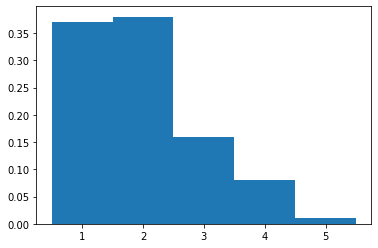

Total execution time =  7.716723203659058


In [15]:
start = time.time()
x = degree_freq_cdf(g100,50)[2] # degrees_seq as a horizontal axis
bin_edges = np.arange(0.5, max(x)+1, 1)
print(x)
plt.hist(x, bins = bin_edges, density = True)
plt.xticks(np.arange(1, max(x)+1, 1))
plt.show()
end = time.time()
total_time = end-start
print("Total execution time = ", total_time)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4]


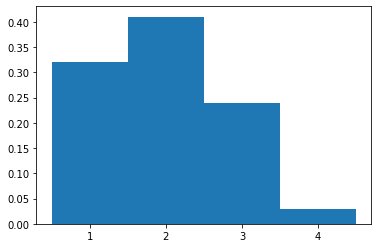

Total execution time =  17.090154886245728


In [16]:
start = time.time()
x = degree_freq_cdf(g100,100)[2] # degrees_seq as a horizontal axis
bin_edges = np.arange(0.5, max(x)+1, 1)
print(x)
plt.hist(x, bins = bin_edges, density = True)
plt.xticks(np.arange(1, max(x)+1, 1))
plt.show()
end = time.time()
total_time = end-start
print("Total execution time = ", total_time)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5]


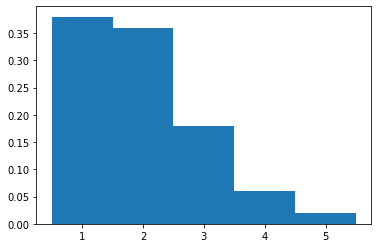

Total execution time =  78.34706234931946


In [17]:
start = time.time()
x = degree_freq_cdf(g100,500)[2] # degrees_seq as a horizontal axis
bin_edges = np.arange(0.5, max(x)+1, 1)
print(x)
plt.hist(x, bins = bin_edges, density = True)
plt.xticks(np.arange(1, max(x)+1, 1))
plt.show()
end = time.time()
total_time = end-start
print("Total execution time = ", total_time)

### Script test 7/25/2022
#### Histogram characteristics based on vertices n

Histogram plot for n =  10


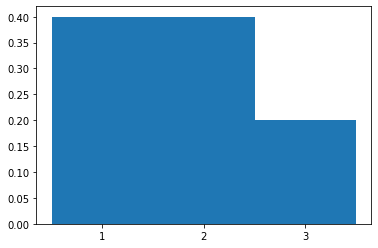

Histogram plot for n =  20


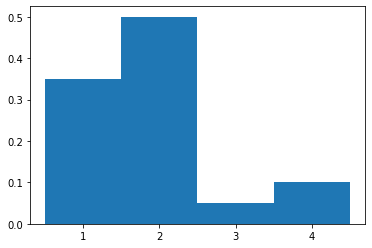

Histogram plot for n =  50


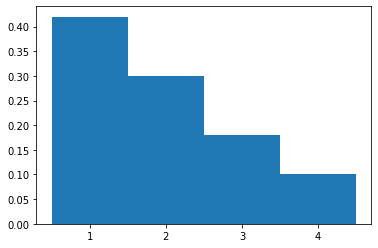

Histogram plot for n =  100


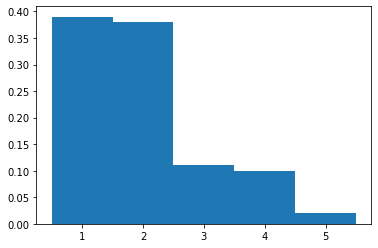

Histogram plot for n =  200


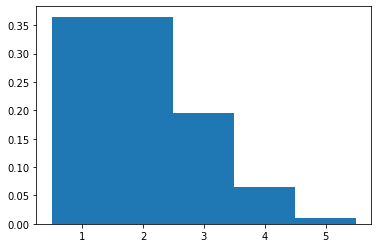

Histogram plot for n =  500


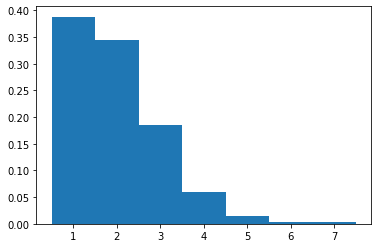

Histogram plot for n =  1000


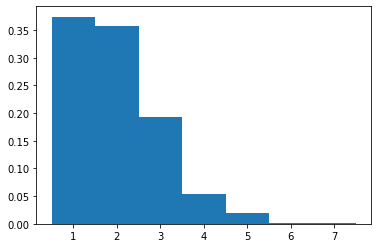

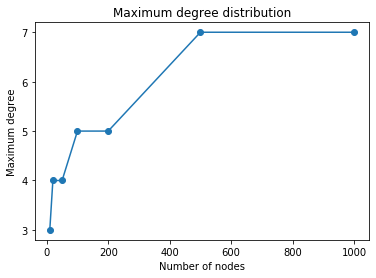

Total execution time =  2340.7046372890472


In [18]:
vertices = [10, 20, 50, 100, 200, 500, 1000]

start = time.time()
max_deg_dict = {}

for n in vertices:
    g = nx.to_scipy_sparse_matrix(nx.complete_graph(n))
    deg_list = degree_freq_cdf(g, 100)[2] # 100 replicated spanning trees
    max_deg = max(deg_list)
    max_deg_dict[n] = max_deg
    
    # Histogram plot
    bin_edges = np.arange(0.5, max(deg_list)+1, 1)
    print("Histogram plot for n = ", n)
    plt.hist(deg_list, bins = bin_edges, density = True)
    plt.xticks(np.arange(1, max(deg_list)+1, 1))
    plt.show()
    
# Line plots of maximum degree
fig, ax = plt.subplots()

ax.plot(list(max_deg_dict), list(max_deg_dict.values()), marker="o")
plt.title("Maximum degree distribution")
plt.xlabel("Number of nodes")
plt.ylabel("Maximum degree")
plt.yticks(np.arange(min(list(max_deg_dict.values())), max(list(max_deg_dict.values()))+1, 1))
plt.show()

end = time.time()
print("Total execution time = ", end-start)

In [29]:
list(max_deg_dict)

[]

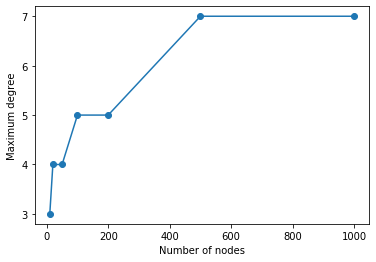

In [19]:
fig, ax = plt.subplots()

ax.plot(list(max_deg_dict), list(max_deg_dict.values()), marker="o")
plt.xlabel("Number of nodes")
plt.ylabel("Maximum degree")
plt.yticks(np.arange(min(list(max_deg_dict.values())), max(list(max_deg_dict.values()))+1, 1))
plt.show()

In [21]:
max_deg_dict

{10: 3, 20: 4, 50: 4, 100: 5, 200: 5, 500: 7, 1000: 7}

In [23]:
deg_list

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


### Script test 8/20/2022

#### Maximum degree variability

In [15]:
vertices = [10, 20, 50, 100, 200]

start = time.time()
max_deg_dict = {}
std_error_list = []

# For each number of node, create 50 times of maximum degree
for n in vertices:
    g = nx.to_scipy_sparse_matrix(nx.complete_graph(n))
    max_deg_list = []
    for _ in range(50):
        deg_list = degree_freq_cdf(g, 100)[2] # 100 replicated spanning trees
        max_deg = max(deg_list)
        max_deg_list.append(max_deg)
    max_deg_dict[n] = np.average(max_deg_list)
    std_error = np.std(list(max_deg_dict.values())) / np.sqrt(len(list(max_deg_dict.values())))
    std_error_list.append(std_error)
"""    
    # Histogram plot
    bin_edges = np.arange(0.5, max(deg_list)+1, 1)
    print("Histogram plot for n = ", n)
    plt.hist(deg_list, bins = bin_edges, density = True)
    plt.xticks(np.arange(1, max(deg_list)+1, 1))
    plt.show()
    
# Line plots of maximum degree
fig, ax = plt.subplots()

ax.errorbar(list(max_deg_dict), list(max_deg_dict.values()), yerr = std_error_list, marker="o")
plt.title("Maximum degree distribution")
plt.xlabel("Number of nodes")
plt.ylabel("Maximum degree")
plt.yticks(np.arange(min(list(max_deg_dict.values())), max(list(max_deg_dict.values()))+1, 1))
plt.show()"""

end = time.time()
print("Total execution time = ", end-start)

Total execution time =  4111.1864194869995


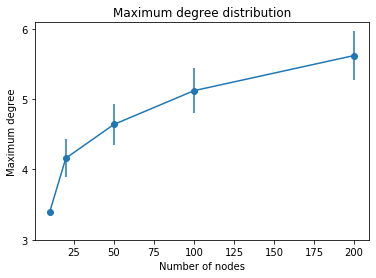

In [27]:
# Line plots of maximum degree
fig, ax = plt.subplots()

ax.errorbar(list(max_deg_dict), list(max_deg_dict.values()), yerr = std_error_list, marker="o")
plt.title("Maximum degree distribution")
plt.xlabel("Number of nodes")
plt.ylabel("Maximum degree")
plt.yticks(np.arange(math.floor(min(list(max_deg_dict.values()))), max(list(max_deg_dict.values()))+1, 1))
plt.show()

In [17]:
max_deg_dict

{10: 3.4, 20: 4.16, 50: 4.64, 100: 5.12, 200: 5.62}

In [20]:
std_error_list

[0.0,
 0.2687005768508881,
 0.29474408233936444,
 0.31760824926314496,
 0.3432363617101195]

In [19]:
std_error

0.3432363617101195

### Script test 8/22/2022

#### Maximum degree variability

In [35]:
vertices = [5,10,50,100,200]

start = time.time()
max_deg_dict = {}
std_list = []

# For each number of node, create 50 times of maximum degree
for n in vertices:
    g = nx.to_scipy_sparse_matrix(nx.complete_graph(n))
    max_deg_list = []
    for _ in range(50):
        deg_list = degree_freq_cdf(g, 100)[1] # 100 replicated spanning trees
        max_deg = max(deg_list)
        max_deg_list.append(max_deg)
    max_deg_dict[n] = np.average(max_deg_list)
    std = np.std(list(max_deg_dict.values())) #/ np.sqrt(len(list(max_deg_dict.values())))
    std_list.append(std)
end = time.time()
print("Total execution time = ", end-start)

Total execution time =  4283.630802154541


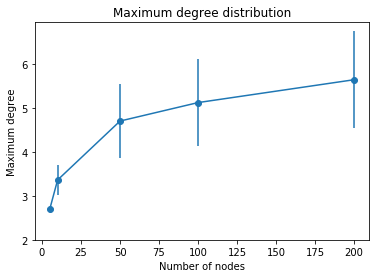

In [36]:
# Line plots of maximum degree
fig, ax = plt.subplots()

ax.errorbar(list(max_deg_dict), list(max_deg_dict.values()), yerr = std_list, marker="o")
plt.title("Maximum degree distribution")
plt.xlabel("Number of nodes")
plt.ylabel("Maximum degree")
plt.yticks(np.arange(math.floor(min(list(max_deg_dict.values()))), max(list(max_deg_dict.values()))+1, 1))
plt.show()

In [45]:
vertices = [5,10,50,100,200,500,1000]

start = time.time()
max_deg_dict = {}
std_list = []

# For each number of node, create 50 times of maximum degree
for n in vertices:
    g = nx.to_scipy_sparse_matrix(nx.complete_graph(n))
    max_deg_list = []
    for _ in range(50):
        deg_list = degree_freq_cdf(g, 100)[1] # 100 replicated spanning trees
        max_deg = max(deg_list)
        max_deg_list.append(max_deg)
    max_deg_dict[n] = np.average(max_deg_list)
    std = np.std(list(max_deg_dict.values())) #/ np.sqrt(len(list(max_deg_dict.values())))
    std_list.append(std)
    end = time.time()
    print("Total execution time for ",n, "nodes = ", end-start)

Total execution time for  5 nodes =  1.6533854007720947
Total execution time for  10 nodes =  7.6262922286987305
Total execution time for  50 nodes =  175.1413435935974
Total execution time for  100 nodes =  852.0165202617645
Total execution time for  200 nodes =  3570.8866028785706
Total execution time for  500 nodes =  22062.663816452026
Total execution time for  1000 nodes =  94878.77190613747


In [55]:
std_list

[0.0,
 0.34999999999999987,
 0.8463779035132919,
 1.0225825150079577,
 1.1290633286047334,
 1.2598412598418898,
 1.3460509133106704]

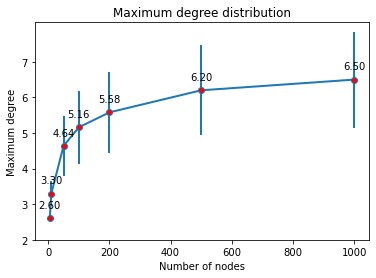

In [75]:
# Line plots of maximum degree
fig, ax = plt.subplots()

x = list(max_deg_dict)
y = list(max_deg_dict.values())
ax.errorbar(x, y, yerr = std_list, marker="o", linewidth=2, mfc="red")
plt.title("Maximum degree distribution")
plt.xlabel("Number of nodes")
plt.ylabel("Maximum degree")
plt.yticks(np.arange(math.floor(min(y)), max(y)+1, 1))
for x,y in zip(x, y):   
    plt.annotate("{:.2f}".format(y), (x,y), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

### Script test 9/5/2022
#### Code profiling

In [101]:
import cProfile

In [104]:
def max_deg_plot(n):
    g = nx.to_scipy_sparse_matrix(nx.complete_graph(n))
    max_deg_list = []
    for _ in range(50):
        deg_list = degree_freq_cdf(g, 100)[1] # 100 replicated spanning trees
        max_deg = max(deg_list)
        max_deg_list.append(max_deg)
    max_deg_dict[n] = np.average(max_deg_list)
    std = np.std(list(max_deg_dict.values())) #/ np.sqrt(len(list(max_deg_dict.values())))
    std_list.append(std)

In [106]:
cProfile.run('max_deg_plot(100)')

         2629079007 function calls (2629069005 primitive calls) in 1169.048 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     5000   60.103    0.012 1168.381    0.234 1812804703.py:1(sample_spanning_tree)
     5000    0.024    0.000    0.024    0.000 1812804703.py:63(<listcomp>)
     5000    0.013    0.000    0.013    0.000 1812804703.py:7(<listcomp>)
   500000    0.895    0.000    0.895    0.000 1812804703.py:8(<listcomp>)
   247008    0.514    0.000    0.514    0.000 1812804703.py:89(<listcomp>)
       50    0.235    0.005 1169.192   23.384 2248097169.py:1(degree_freq_cdf)
     5000    0.051    0.000    0.350    0.000 2248097169.py:12(<listcomp>)
        1    0.005    0.005 1169.208 1169.208 2485269729.py:1(max_deg_plot)
    10000    0.147    0.000    0.147    0.000 3176392900.py:1(output_update)
     5000    0.008    0.000    0.031    0.000 <__array_function__ internals>:2(atleast_2d)
        1    0.000    0.000    0.

In [108]:
cProfile.run('sample_tree = sample_spanning_tree(nx.to_scipy_sparse_matrix(nx.complete_graph(100)))')

         865740 function calls (865736 primitive calls) in 0.376 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.012    0.012    0.364    0.364 1812804703.py:1(sample_spanning_tree)
        1    0.000    0.000    0.000    0.000 1812804703.py:63(<listcomp>)
        1    0.000    0.000    0.000    0.000 1812804703.py:7(<listcomp>)
      100    0.000    0.000    0.000    0.000 1812804703.py:8(<listcomp>)
       48    0.000    0.000    0.000    0.000 1812804703.py:89(<listcomp>)
        2    0.000    0.000    0.000    0.000 3176392900.py:1(output_update)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(atleast_2d)
       16    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(can_cast)
        4    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(empty_like)
    32401    0.012    0.000    0.074    0.000 <__array_function__ internals>:2(ndim)
        1

In [109]:
cProfile.run('degree_freq_cdf(nx.to_scipy_sparse_matrix(nx.complete_graph(100)), 100)[1]')

         52493204 function calls (52493002 primitive calls) in 24.041 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      100    1.261    0.013   23.913    0.239 1812804703.py:1(sample_spanning_tree)
      100    0.001    0.000    0.001    0.000 1812804703.py:63(<listcomp>)
      100    0.000    0.000    0.000    0.000 1812804703.py:7(<listcomp>)
    10000    0.019    0.000    0.019    0.000 1812804703.py:8(<listcomp>)
     4880    0.011    0.000    0.011    0.000 1812804703.py:89(<listcomp>)
        1    0.005    0.005   23.930   23.930 2248097169.py:1(degree_freq_cdf)
      100    0.001    0.000    0.007    0.000 2248097169.py:12(<listcomp>)
      200    0.003    0.000    0.003    0.000 3176392900.py:1(output_update)
      100    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(atleast_2d)
     1006    0.001    0.000    0.002    0.000 <__array_function__ internals>:2(can_cast)
      100    0.000    0.00

### Script test 9/7/2022

#### Speeding up code

In [15]:
def output_update_old(path, output):
    # Using pairs of nodes to generate output
    for i in range(len(path)-1):
        output[path[i], path[i+1]] = 1
        output[path[i+1], path[i]] = 1
    return output

In [16]:
def feasible_node(start_node, num_nodes, mat_A):
    feasible_node = []
    for j in range(num_nodes):
        if mat_A[start_node, j] > 0: # This node pair is connected        
            feasible_node.append(j)
    return feasible_node

In [17]:
def sample_spanning_tree_old(A):
    # Step 1: Function setup
    num_nodes = A.shape[0]
    mat_A = A.todense()
    universe_node_list = set(range(num_nodes))
    unused_node_list = list(range(num_nodes))
    visited_node = [False]*num_nodes
    output_init = np.zeros((num_nodes,num_nodes), dtype = "int32") # Create output to be updated when used
    start_node = random.choice(unused_node_list)
    visited_node[start_node] = True
    #print(start_node)
    unused_node_list.remove(start_node) # Then we take it out already picked node
    terminal_node = random.choice(unused_node_list) # Select other node as a terminal
    unused_node_list.remove(terminal_node) # Then again we remove it
    path = np.empty(0, dtype="int32")
    path = np.append(path, start_node)
    is_already_tree = False
    
    # Step 2: Perform LERW and obtain the initial path
    while visited_node[terminal_node] == False:
        x = feasible_node(start_node, num_nodes, mat_A) # Get neighbor nodes
        next_node = random.choice(x) # Pick the node
        #print(next_node)
        # Check if the next moved node creates a loop --> reset the path (path, visited node)
        if next_node in path:
            index = np.where(path == next_node)[0][0]
            path = path[:index+1]
            start_node = next_node
            continue
            
        # Update a new initial node and add the edge to the graph
        visited_node[next_node] = True
        path = np.append(path, next_node)
        start_node = next_node
                
    init_path = np.copy(path)
    #print(init_path)
    # Update visited_node status after obtaining initial path           
    for i in universe_node_list:
        if i in init_path:
            visited_node[i] = True
        else:
            visited_node[i] = False
            
    output = output_update_old(path, output_init)
    # If LERW already gives us spanning tree, return the output matrix
    if set(path) == set(universe_node_list): # completely visited
        #print("1st case")
        is_already_tree = True
        return output, sp.sparse.csr_matrix(output)

    # Step 3: Continue picking a random remaining node and walk to the initial path until all nodes are visited.
    # Set up
    remaining_node = [i for i in range(len(visited_node)) if visited_node[i] == False]
    #print(remaining_node)
    #pair_path = []
    new_path = np.empty(0, dtype="int32")
    temp_path = np.empty(0, dtype="int32")
    is_connected = False
    while len(remaining_node) > 0 or is_connected == False:  #is_connect checks when there's no path to the main path
        # Firstly, generate the new start node if there's nothing to start from
        if len(temp_path) == 0:
            new_start_node = random.choice(remaining_node)
            #print(new_start_node)
            temp_path = np.append(temp_path, new_start_node)
            
        new_x = feasible_node(new_start_node, num_nodes, mat_A)
        new_next_node = random.choice(new_x)
        #print(new_next_node)

        if new_next_node in path:
            #if len(temp_path) > 1: # for the case when walking more than 1 node and reach the path later
            #    for i in range(len(temp_path)-1):
            #       temp_path = np.append(temp_path, new_next_node)
            temp_path = np.append(temp_path, new_next_node)
            path = np.append(path, temp_path)
            remaining_node = [node for node in remaining_node if node not in temp_path]
            output = output_update_old(temp_path, output)
            is_connected = True
            temp_path = np.empty(0, dtype="int32") # empty it again because the new path joins the main path

        else: # check if it's not joining the path, is it a loop?
            if new_next_node not in temp_path:
                if len(remaining_node) == 1: #this is the last node, and it should connect to node in path
                    new_start_node = new_next_node
                    feasible_node(new_start_node, num_nodes, mat_A)
                    new_next_node = random.choice(new_feasible_node)
                    #index = np.where(temp_path == new_next_node)[0][0]
                    #temp_path = temp_path[:index+1]
                    temp_path = np.append(temp_path, new_next_node)
                    path = np.append(path, temp_path)
                    output = output_update_old(temp_path, output)
                    #pair_path.append((new_start_node, new_next_node))
                    #remaining_node.extend(loop)
                    break
                else: # the next node is not joining the LERW path, and it's not a loop
                    temp_path = np.append(temp_path,new_next_node)
                    #remaining_node.remove(new_next_node)
                    new_start_node = new_next_node
            else: # This is a loop
                index = np.where(temp_path == new_next_node)[0][0]
                loop = temp_path[index+1:]
                temp_path = temp_path[:index+1]
                remaining_node.extend(loop) # return those nodes back to be available
                new_start_node = new_next_node
                
    #output = output_update_old(path, output)  
    #print("2nd case")
    return output, sp.sparse.csr_matrix(output)#, init_path, pair, pair_path, path

In [345]:
x = [sample_spanning_tree(A)[0].tolist() for _ in range(10)]

In [365]:
type(sample_spanning_tree(A)[0][0][0])

numpy.int32

In [6]:
def spanning_tree_probability(graph, ntimes):
    spanning_tree = [sample_spanning_tree(graph)[0].tolist() for j in range(ntimes)]
    
    # Firstly, transform the sparse matrix to immutable object (tuple), so it'll be hashable    
    for i in spanning_tree:
        for j in range(len(i)):
            i[j] = tuple(i[j])

    for i in range(len(spanning_tree)):
        spanning_tree[i] = tuple(spanning_tree[i]) 
        
    # Then, count how many different spanning trees are generated
    tree_count = {}
    for i in spanning_tree:
        tree_count[i] = tree_count.get(i,0) + 1
        
    # Finally, calculate the probability
    prob_list = []
    n_total = 0
    for i in tree_count:
        n_total += tree_count.get(i)

    for i in tree_count:
        prob_list.append(tree_count.get(i)/n_total)
    
    possible_tree = (graph.shape[0])**(graph.shape[0]-2)
    prob_diff = np.array(prob_list) - np.array(graph.shape[0]*(1/possible_tree) )
    return tree_count, prob_list, abs(prob_diff), spanning_tree

In [352]:
spanning_tree_probability(B, 1000)[1]

[0.003,
 0.003,
 0.004,
 0.001,
 0.006,
 0.004,
 0.005,
 0.011,
 0.005,
 0.006,
 0.005,
 0.005,
 0.006,
 0.005,
 0.004,
 0.003,
 0.01,
 0.004,
 0.007,
 0.003,
 0.002,
 0.003,
 0.004,
 0.003,
 0.002,
 0.008,
 0.008,
 0.004,
 0.004,
 0.005,
 0.006,
 0.002,
 0.004,
 0.006,
 0.003,
 0.003,
 0.004,
 0.003,
 0.006,
 0.006,
 0.001,
 0.006,
 0.007,
 0.005,
 0.007,
 0.003,
 0.003,
 0.008,
 0.003,
 0.008,
 0.007,
 0.007,
 0.004,
 0.005,
 0.005,
 0.006,
 0.006,
 0.003,
 0.004,
 0.002,
 0.001,
 0.002,
 0.005,
 0.003,
 0.006,
 0.003,
 0.003,
 0.011,
 0.01,
 0.004,
 0.004,
 0.006,
 0.008,
 0.005,
 0.005,
 0.006,
 0.002,
 0.003,
 0.001,
 0.002,
 0.002,
 0.003,
 0.003,
 0.003,
 0.004,
 0.003,
 0.005,
 0.004,
 0.008,
 0.005,
 0.002,
 0.003,
 0.005,
 0.009,
 0.004,
 0.004,
 0.006,
 0.004,
 0.002,
 0.007,
 0.005,
 0.007,
 0.002,
 0.004,
 0.005,
 0.004,
 0.003,
 0.003,
 0.003,
 0.002,
 0.01,
 0.005,
 0.009,
 0.005,
 0.002,
 0.004,
 0.004,
 0.006,
 0.003,
 0.005,
 0.005,
 0.003,
 0.005,
 0.006,
 0.003,
 0.

In [356]:
# Test for 3,4, and 5 nodes graph
start = time.time()
print(spanning_tree_probability(C, 10000)[1]) # 3 nodes ([0.3353, 0.3317, 0.333])
print(spanning_tree_probability(D, 50000)[1]) # 4 nodes
print(spanning_tree_probability(A, 50000)[1]) # 5 nodes
end = time.time()
print(end-start, " secs")

[0.3342, 0.3353, 0.3305]
[0.06202, 0.0627, 0.06188, 0.06252, 0.06154, 0.0612, 0.06176, 0.06346, 0.06268, 0.06456, 0.06198, 0.0609, 0.063, 0.06336, 0.0626, 0.06384]
[0.02484, 0.0247, 0.02472, 0.02462, 0.02456, 0.0236, 0.0253, 0.02564, 0.02528, 0.02372, 0.02486, 0.02696, 0.02586, 0.02556, 0.02416, 0.02502, 0.02314, 0.02494, 0.02462, 0.0247, 0.02536, 0.02658, 0.02408, 0.0249, 0.02418, 0.02408, 0.0262, 0.02646, 0.02514, 0.02434, 0.02486, 0.0257, 0.02484, 0.02442, 0.02526, 0.02422, 0.025, 0.02568, 0.02644, 0.02546]
27.855022192001343  secs


In [355]:
# Test for 3,4, and 5 nodes graph
start = time.time()
print(spanning_tree_probability_old(C, 10000)[1]) # 3 nodes ([0.3353, 0.3317, 0.333])
print(spanning_tree_probability_old(D, 50000)[1]) # 4 nodes
print(spanning_tree_probability_old(A, 50000)[1]) # 5 nodes
end = time.time()
print(end-start, " secs")

[0.3309, 0.3322, 0.3369]
[0.06098, 0.06318, 0.06018, 0.06328, 0.06376, 0.06058, 0.06274, 0.06376, 0.06218, 0.06234, 0.06262, 0.06246, 0.06016, 0.0642, 0.0633, 0.06428]
[0.02616, 0.02522, 0.02422, 0.02564, 0.02504, 0.02568, 0.026, 0.0238, 0.02468, 0.02332, 0.024, 0.0247, 0.0247, 0.02574, 0.02532, 0.02474, 0.02542, 0.02478, 0.02548, 0.02454, 0.02544, 0.02422, 0.02588, 0.02508, 0.0257, 0.02582, 0.02434, 0.02464, 0.02502, 0.0258, 0.02432, 0.02478, 0.02554, 0.02494, 0.02434, 0.02572, 0.02518, 0.02406, 0.02526, 0.02474]
32.63394021987915  secs


In [42]:
def degree_freq_cdf(g, n):
    '''To calculate the degree of all vertices of a tree, take a look at the CDF of the degrees, aggregating over all
    randomly-generated spanning trees'''
    cdf_mat = []
    #deg_feq = []
    
    # Generate n spanning tree from the original graph, g.
    for i in range(n):
        sample_tree = sample_spanning_tree(g)[0]
        if i == n-1:
            print("Completed generated spanning trees ")
        
        # For each tree, compute degrees and sort them.
        degrees = [sum(i) for i in sample_tree]
        degrees_seq = sorted(degrees)
        deg_counter = collections.Counter(degrees_seq) # Count the number of times for each degree
        #deg_feq.append(deg_counter)
        
        # Look at how PMF and CDF of the degrees looks, collect all degree CDF from individual spanning tree.
        pmf_dict = {}

        for i in range(1, max(deg_counter)+1):
            pmf_dict[i] = round(deg_counter.get(i, 0)/len(degrees_seq), 3) # If there's no specific num of node, use zero.
        pmf = list(pmf_dict.values())
        cdf = np.cumsum(pmf)
        cdf_mat.append(cdf)
        
    return cdf_mat, degrees_seq

In [367]:
degree_freq_cdf(A,10)

([array([0.4, 1. ]),
  array([0.4, 1. ]),
  array([0.6, 0.8, 1. ]),
  array([0.6, 0.8, 1. ]),
  array([0.6, 0.8, 1. ]),
  array([0.6, 0.8, 1. ]),
  array([0.4, 1. ]),
  array([0.6, 0.8, 1. ]),
  array([0.8, 0.8, 0.8, 1. ]),
  array([0.4, 1. ])],
 [1, 1, 2, 2, 2])

In [368]:
# This function needs to be modified if we use in the future

def avg_deg_freq(g, ntrees):
    res = []
    x = degree_freq_cdf(g, ntrees)[0] # [0] indicates degree frequency after generating random spanning trees

    for i in x: # 
        for j in range(max(i)): # use max index key due to some degree-skipped sample
            if i.get(j+1) == None:
                res.append((j+1, 0))
            else:
                res.append((j+1, i.get(j+1)))

    avg_res = {}
    for key, val in res:
        #avg_res[key] = avg_res.get(key, 0) + val
        avg_res.setdefault(key, []).append(val)        

    for i in avg_res:
        avg_res[i] = round(np.average(avg_res[i]), 4)

    return avg_res, x

In [ ]:
vertices = [5,10,50,100,200]

start = time.time()
max_deg_dict = {}
std_list = []

# For each number of node, create 50 times of maximum degree
for n in vertices:
    g = nx.to_scipy_sparse_matrix(nx.complete_graph(n))
    max_deg_list = []
    for _ in range(50):
        deg_list = degree_freq_cdf(g, 100)[1] # 100 replicated spanning trees
        max_deg = max(deg_list)
        max_deg_list.append(max_deg)
    max_deg_dict[n] = np.average(max_deg_list)
    std = np.std(list(max_deg_dict.values())) #/ np.sqrt(len(list(max_deg_dict.values())))
    std_list.append(std)
end = time.time()
print("Total execution time = ", end-start)

In [170]:
def max_deg_plot(nodes, ntrees, n):
    print("Running for n = ", nodes)
    start = time.time()
    g = nx.to_scipy_sparse_matrix(nx.complete_graph(nodes))
    max_deg_dict = {}
    std_list = []
    max_deg_list = []
    for _ in range(n):
        deg_list = degree_freq_cdf(g, ntrees)[1] # 100 replicated spanning trees
        #print("Completed running degree_freq_cdf")
        max_deg = max(deg_list)
        max_deg_list.append(max_deg)
    avg = np.average(max_deg_list)
    std = np.std(max_deg_list)
    max_deg_dict[nodes] = (avg,std)
    #std = np.std(list(max_deg_dict.values())) #/ np.sqrt(len(list(max_deg_dict.values())))
    #std_list.append(std)
    end = time.time()
    print("Total execution time for ", nodes, "nodes = ", end-start, " seconds")
    return max_deg_dict

In [43]:
vertices = [5,10,50,100,200,500,1000,2000,5000]
result = [max_deg_plot(v, 100, 50) for v in vertices]

n =  5
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed ge

Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed 

Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed 

Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning 

Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed 

Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed 

Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanni

Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed 

Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed 

Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed 

Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed

Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed 

Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated

Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed 

Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed 

Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed 

Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed 

Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed 

Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed 

Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generat

Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed 

Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed 

Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning 

Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated 

Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed 

Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed 

Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning 

Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed 

Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed 

Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning

Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed 

Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed 

Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed 

Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed 

Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed 

Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed 

Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed 

Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed 

Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed genera

Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning 

Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning 

Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spannin

Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed 

Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed 

Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed 

Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed 

Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed 

Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed 

Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed 

Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed 

Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed 

Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed gener

Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed 

Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed 

Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed 

Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed 

Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed gene

Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning 

Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanni

Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed 

Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed 

Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed 

Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed 

Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed 

Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed 

Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning 

Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spann

Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed 

Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed 

Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed 

Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed 

Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed 

Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed genera

Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning 

Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed 

Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed 

Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed 

Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed 

Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed gen

Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning 

Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed 

Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed 

Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed 

Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed 

Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed 

Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning 

Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed 

Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed 

Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed 

Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed 

Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed genera

Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanni

Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed 

Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed 

Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed 

Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed 

Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning 

Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed

Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed 

Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed 

Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed 

Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed ge

Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning 

Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed 

Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed 

Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed 

Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed 

Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generate

Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated span

Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed 

Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed 

Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed 

Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed 

Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning 

Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed 

Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed 

Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed 

Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed 

Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning 

Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed

Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed 

Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed 

Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed 

Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generat

Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spann

Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed 

Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed 

Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed 

Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed g

Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning 

Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed 

Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed 

Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed 

Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed 

Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning 

Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed 

Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed 

Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed 

Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed 

Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated

Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spa

Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed 

Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed 

Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed 

Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed gen

Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning 

Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed 

Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed 

Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed 

Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed 

Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning 

Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed 

Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed 

Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed 

Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed 

Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated

Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spa

Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed 

Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed 

Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed 

Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed gen

Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning 

Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed 

Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed 

Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed 

Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed 

Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning 

Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed 

Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed 

Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed 

Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed 

Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning 

Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated 

Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed 

Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed 

Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed 

Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed genera

Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanni

Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed 

Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed 

Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed 

Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed 

Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning 

Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed 

Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed 

Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed 

Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed 

Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning 

Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed

Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed 

Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed 

Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed 

Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generat

Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Total execution time for  2000 nodes =  29493.039113521576  seconds
n =  5000
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees 

Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed 

Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed 

Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed 

Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed ge

Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning 

Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed 

Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed 

Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed 

Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed 

Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning 

Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed 

Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed 

Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed 

Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed 

Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated

Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spa

Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed 

Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed 

Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed 

Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed gen

Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning 

Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed generated spanning trees  73 / 100
Completed generated spanning trees  74 / 100
Completed generated spanning trees  75 / 100
Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed 

Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed generated spanning trees  54 / 100
Completed generated spanning trees  55 / 100
Completed generated spanning trees  56 / 100
Completed generated spanning trees  57 / 100
Completed generated spanning trees  58 / 100
Completed generated spanning trees  59 / 100
Completed generated spanning trees  60 / 100
Completed generated spanning trees  61 / 100
Completed generated spanning trees  62 / 100
Completed generated spanning trees  63 / 100
Completed generated spanning trees  64 / 100
Completed generated spanning trees  65 / 100
Completed generated spanning trees  66 / 100
Completed generated spanning trees  67 / 100
Completed generated spanning trees  68 / 100
Completed generated spanning trees  69 / 100
Completed generated spanning trees  70 / 100
Completed generated spanning trees  71 / 100
Completed generated spanning trees  72 / 100
Completed 

Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed generated spanning trees  35 / 100
Completed generated spanning trees  36 / 100
Completed generated spanning trees  37 / 100
Completed generated spanning trees  38 / 100
Completed generated spanning trees  39 / 100
Completed generated spanning trees  40 / 100
Completed generated spanning trees  41 / 100
Completed generated spanning trees  42 / 100
Completed generated spanning trees  43 / 100
Completed generated spanning trees  44 / 100
Completed generated spanning trees  45 / 100
Completed generated spanning trees  46 / 100
Completed generated spanning trees  47 / 100
Completed generated spanning trees  48 / 100
Completed generated spanning trees  49 / 100
Completed generated spanning trees  50 / 100
Completed generated spanning trees  51 / 100
Completed generated spanning trees  52 / 100
Completed generated spanning trees  53 / 100
Completed 

Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning trees  16 / 100
Completed generated spanning trees  17 / 100
Completed generated spanning trees  18 / 100
Completed generated spanning trees  19 / 100
Completed generated spanning trees  20 / 100
Completed generated spanning trees  21 / 100
Completed generated spanning trees  22 / 100
Completed generated spanning trees  23 / 100
Completed generated spanning trees  24 / 100
Completed generated spanning trees  25 / 100
Completed generated spanning trees  26 / 100
Completed generated spanning trees  27 / 100
Completed generated spanning trees  28 / 100
Completed generated spanning trees  29 / 100
Completed generated spanning trees  30 / 100
Completed generated spanning trees  31 / 100
Completed generated spanning trees  32 / 100
Completed generated spanning trees  33 / 100
Completed generated spanning trees  34 / 100
Completed 

Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed generated spanning trees  98 / 100
Completed generated spanning trees  99 / 100
Completed generated spanning trees  100 / 100
Completed running degree_freq_cdf
Completed generated spanning trees  1 / 100
Completed generated spanning trees  2 / 100
Completed generated spanning trees  3 / 100
Completed generated spanning trees  4 / 100
Completed generated spanning trees  5 / 100
Completed generated spanning trees  6 / 100
Completed generated spanning trees  7 / 100
Completed generated spanning trees  8 / 100
Completed generated spanning trees  9 / 100
Completed generated spanning trees  10 / 100
Completed generated spanning trees  11 / 100
Completed generated spanning trees  12 / 100
Completed generated spanning trees  13 / 100
Completed generated spanning trees  14 / 100
Completed generated spanning trees  15 / 100
Completed generated spanning 

Completed generated spanning trees  76 / 100
Completed generated spanning trees  77 / 100
Completed generated spanning trees  78 / 100
Completed generated spanning trees  79 / 100
Completed generated spanning trees  80 / 100
Completed generated spanning trees  81 / 100
Completed generated spanning trees  82 / 100
Completed generated spanning trees  83 / 100
Completed generated spanning trees  84 / 100
Completed generated spanning trees  85 / 100
Completed generated spanning trees  86 / 100
Completed generated spanning trees  87 / 100
Completed generated spanning trees  88 / 100
Completed generated spanning trees  89 / 100
Completed generated spanning trees  90 / 100
Completed generated spanning trees  91 / 100
Completed generated spanning trees  92 / 100
Completed generated spanning trees  93 / 100
Completed generated spanning trees  94 / 100
Completed generated spanning trees  95 / 100
Completed generated spanning trees  96 / 100
Completed generated spanning trees  97 / 100
Completed 

In [84]:
result

[{5: (2.74, 0.5219195340279956)},
 {10: (3.48, 0.6079473661428265)},
 {50: (4.92, 0.6881860213634101)},
 {100: (5.1, 0.458257569495584)},
 {200: (5.6, 0.6928203230275509)},
 {500: (6.28, 0.8494704232638121)},
 {1000: (6.58, 0.7236021006050218)},
 {2000: (6.8, 0.8246211251235321)},
 {5000: (7.3, 0.7549834435270749)}]

In [86]:
nodes = [key for dic in result for key in dic]
avg_max_deg = [i[0] for dic in result for i in list(dic.values())]
std_list = [i[1] for dic in result for i in list(dic.values())]

print(nodes)
print(avg_max_deg)
print(std_list)

[5, 10, 50, 100, 200, 500, 1000, 2000, 5000]
[2.74, 3.48, 4.92, 5.1, 5.6, 6.28, 6.58, 6.8, 7.3]
[0.5219195340279956, 0.6079473661428265, 0.6881860213634101, 0.458257569495584, 0.6928203230275509, 0.8494704232638121, 0.7236021006050218, 0.8246211251235321, 0.7549834435270749]


In [168]:
prev_code_time = [1.65, 7.63, 175.14, 852.02, 3570.89, 22062.66, 94878.77, None]
prev_code_time = [i/60 if i != None else None for i in prev_code_time]        
curr_code_time = [2.17, 3.47, 29.19, 91.34, 334.28, 1918.91, 7633.16, 29493.04]
curr_code_time = [i/60 if i != None else None for i in curr_code_time]

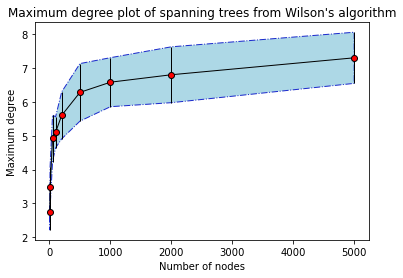

   nodes  average maximum degree  standard deviation
0      5                    2.74            0.521920
1     10                    3.48            0.607947
2     50                    4.92            0.688186
3    100                    5.10            0.458258
4    200                    5.60            0.692820
5    500                    6.28            0.849470
6   1000                    6.58            0.723602
7   2000                    6.80            0.824621
8   5000                    7.30            0.754983


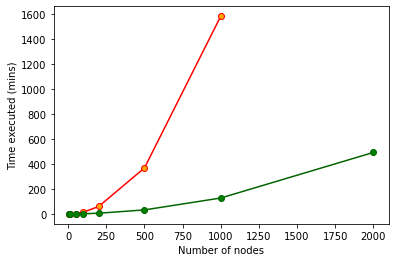

In [175]:
# Line plots of maximum degree
fig, ax = plt.subplots()

x = nodes
y = avg_max_deg
err = std_list
ax.errorbar(x, y, yerr = err, marker="o", linewidth=1, mfc="red", color="black")
plt.fill_between(x, np.array(y) - np.array(err), np.array(y) + np.array(err), edgecolor='#1B2ACC', linestyle='dashdot'
                , facecolor = "lightblue")
plt.title("Maximum degree plot of spanning trees from Wilson's algorithm")
plt.xlabel("Number of nodes")
plt.ylabel("Maximum degree")
plt.yticks(np.arange(math.floor(min(y)), max(y)+1, 1))
#for x,y in zip(x, y):   
#    plt.annotate("{:.2f}".format(y), (x,y), textcoords="offset points", xytext=(1,10), ha='center')
plt.show()

# Result table
data = {"nodes": nodes, "average maximum degree": avg_max_deg, "standard deviation": std_list}
max_deg_df = pd.DataFrame(data)
print(max_deg_df)

# Execution time analysis

fig2, ax2 = plt.subplots()
ax2.plot([5,10,50,100,200,500,1000,2000], np.array(prev_code_time), marker = "o", mfc = "orange", color = "red")
ax2.plot([5,10,50,100,200,500,1000,2000], np.array(curr_code_time), marker = "o", mfc = "green", color = "darkgreen")
plt.xlabel("Number of nodes")
plt.ylabel("Time executed (mins)")
plt.show()

#### Time executed
##### Old version of code
5 nodes =  1.6533854007720947 seconds

10 nodes =  7.6262922286987305 seconds

50 nodes =  175.1413435935974 seconds

100 nodes =  852.0165202617645 seconds

200 nodes =  3570.8866028785706 seconds

500 nodes =  22062.663816452026 seconds

1000 nodes =  94878.77190613747 seconds

##### Current version of code
5 nodes =  2.172417640686035 seconds

10 nodes =  3.4716975688934326  seconds

50 nodes =  29.19156312942505  seconds

100 nodes =  91.34214448928833  seconds

200 nodes =  334.28435039520264  seconds

500 nodes =  1918.9069437980652  seconds

1000 nodes =  7633.156857967377  seconds

2000 nodes =  29493.039113521576  seconds

5000 nodes =  179618.58132219315  seconds

### Script test 9/16/2022

#### Script tuning cont'd

In [ ]:
def sample_spanning_tree_old(A):
    # Step 1: Function setup
    num_nodes = A.shape[0]
    mat_A = A.todense()
    universe_node_list = set(range(num_nodes))
    unused_node_list = list(range(num_nodes))
    visited_node = [False]*num_nodes
    output_init = np.zeros((num_nodes,num_nodes), dtype = "int32") # Create output to be updated when used
    start_node = random.choice(unused_node_list)
    visited_node[start_node] = True
    #print(start_node)
    unused_node_list.remove(start_node) # Then we take it out already picked node
    terminal_node = random.choice(unused_node_list) # Select other node as a terminal
    unused_node_list.remove(terminal_node) # Then again we remove it
    path = np.empty(0, dtype="int32")
    path = np.append(path, start_node)
    is_already_tree = False
    
    # Step 2: Perform LERW and obtain the initial path
    while visited_node[terminal_node] == False:
        x = feasible_node(start_node, num_nodes, mat_A) # Get neighbor nodes
        next_node = random.choice(x) # Pick the node
        #print(next_node)
        # Check if the next moved node creates a loop --> reset the path (path, visited node)
        if next_node in path:
            index = np.where(path == next_node)[0][0]
            path = path[:index+1]
            start_node = next_node
            continue
            
        # Update a new initial node and add the edge to the graph
        visited_node[next_node] = True
        path = np.append(path, next_node)
        start_node = next_node
                
    init_path = np.copy(path)
    #print(init_path)
    # Update visited_node status after obtaining initial path           
    for i in universe_node_list:
        if i in init_path:
            visited_node[i] = True
        else:
            visited_node[i] = False
            
    output = output_update(path, output_init)
    # If LERW already gives us spanning tree, return the output matrix
    if set(path) == set(universe_node_list): # completely visited
        #print("1st case")
        is_already_tree = True
        return output, sp.sparse.csr_matrix(output)
"""
    # Step 3: Continue picking a random remaining node and walk to the initial path until all nodes are visited.
    # Set up
    remaining_node = [i for i in range(len(visited_node)) if visited_node[i] == False]
    #print(remaining_node)
    #pair_path = []
    new_path = np.empty(0, dtype="int32")
    temp_path = np.empty(0, dtype="int32")
    is_connected = False
    while len(remaining_node) > 0 or is_connected == False:  #is_connect checks when there's no path to the main path
        # Firstly, generate the new start node if there's nothing to start from
        if len(temp_path) == 0:
            new_start_node = random.choice(remaining_node)
            #print(new_start_node)
            temp_path = np.append(temp_path, new_start_node)
            
        new_x = feasible_node(new_start_node, num_nodes, mat_A)
        new_next_node = random.choice(new_x)
        #print(new_next_node)

        if new_next_node in path:
            #if len(temp_path) > 1: # for the case when walking more than 1 node and reach the path later
            #    for i in range(len(temp_path)-1):
            #       temp_path = np.append(temp_path, new_next_node)
            temp_path = np.append(temp_path, new_next_node)
            path = np.append(path, temp_path)
            remaining_node = [node for node in remaining_node if node not in temp_path]
            output = output_update(temp_path, output)
            is_connected = True
            temp_path = np.empty(0, dtype="int32") # empty it again because the new path joins the main path

        else: # check if it's not joining the path, is it a loop?
            if new_next_node not in temp_path:
                if len(remaining_node) == 1: #this is the last node, and it should connect to node in path
                    new_start_node = new_next_node
                    feasible_node(new_start_node, num_nodes, mat_A)
                    new_next_node = random.choice(new_feasible_node)
                    #index = np.where(temp_path == new_next_node)[0][0]
                    #temp_path = temp_path[:index+1]
                    temp_path = np.append(temp_path, new_next_node)
                    path = np.append(path, temp_path)
                    output = output_update(temp_path, output)
                    #pair_path.append((new_start_node, new_next_node))
                    #remaining_node.extend(loop)
                    break
                else: # the next node is not joining the LERW path, and it's not a loop
                    temp_path = np.append(temp_path,new_next_node)
                    #remaining_node.remove(new_next_node)
                    new_start_node = new_next_node
            else: # This is a loop
                index = np.where(temp_path == new_next_node)[0][0]
                loop = temp_path[index+1:]
                temp_path = temp_path[:index+1]
                remaining_node.extend(loop) # return those nodes back to be available
                new_start_node = new_next_node
                
    #output = output_update(path, output)  
    #print("2nd case")"""
    return output, sp.sparse.csr_matrix(output)#, init_path, pair, pair_path, path

In [63]:
testd = {1,2,3}
testd-{2,3,4}

{1}

In [60]:
testd

{1: False, 3: False}

In [209]:
def sample_spanning_tree(A):
    # Step 0: Function setup
    num_nodes = A.shape[0]
    mat_A = A.todense()
    unvisited_node = set(range(num_nodes))
    visited_node = {key: False for key in range(num_nodes)}
    walk_hist = np.empty(0, dtype= np.int32)
    #is_connected = False
    output_init = sp.sparse.csr_matrix((num_nodes, num_nodes), dtype = np.int32)
    neighbor_dict = neighbor_nodes(A, num_nodes)
    
    # Step 1: random the start and terminal node
    start_node = random.choice(tuple(unvisited_node))
    #print(start_node)
    visited_node[start_node] = True
    unvisited_node.remove(start_node)
    terminal_node = random.choice(tuple(unvisited_node))
    walk_hist = np.append(walk_hist, start_node)
    #print((start_node, terminal_node))
    #unvisited_node.remove(terminal_node)
    current_node = start_node
    
    # Step 2: Perform LERW and obtain the initial path
    while visited_node[terminal_node] == False:
        feasible_nodes = neighbor_dict[current_node] # Get neighbor nodes
        next_node = random.choice(feasible_nodes) # Pick the node
        current_node = next_node
        #print(next_node)
        # Check if the next moved node creates a loop --> reset the path (path, visited node)
        if visited_node[current_node] == True:
            index = np.where(walk_hist == current_node)[0][0]
            for i in walk_hist[index+1:]:
                visited_node[i] = False
            walk_hist = walk_hist[:index+1]
        else:   
            # Update a new initial node and add the edge to the graph
            visited_node[current_node] = True
            walk_hist = np.append(walk_hist, current_node)
            
    # Update unvisited node and output matrix
    terminal_nodes = set(walk_hist) 
    unvisited_node = set(range(num_nodes)) - terminal_nodes
    output = output_update(walk_hist, output_init)    
    
    # If LERW already gives us spanning tree, return the output matrix
    if len(unvisited_node) == 0: # completely visited
        #print("1st case")
        is_connected = True
    #print("walk_hist =", walk_hist)
    #print("unvisited_node =", unvisited_node)
    #print("visited_node =", visited_node)
    # Step 3: Continue picking a random remaining node and walk to the initial path until all nodes are visited.
    # Set up
    new_walk_hist = np.empty(0, dtype=np.int32)

    while len(unvisited_node) != 0:  #is_connect checks when there's no path to the main path
        # Firstly, generate the new start node if there's nothing to start from
        if len(new_walk_hist) == 0:
            start_node = random.choice(tuple(unvisited_node))
            #print(start_node)
            visited_node[start_node] = True
            new_walk_hist = np.append(new_walk_hist, start_node)
            current_node = start_node    
        
        while current_node not in terminal_nodes: # keep walking if it's not joining the path 
            feasible_nodes = neighbor_dict[current_node]
            next_node = random.choice(feasible_nodes)
            #print(next_node)
            current_node = next_node
            
            if current_node in unvisited_node: # Normal walk 
                visited_node[current_node] = True
                new_walk_hist = np.append(new_walk_hist, next_node)              

            elif visited_node[current_node] == True: 
                if current_node in unvisited_node: # Loop
                    index = np.where(new_walk_hist == current_node)[0][0]
                    for i in new_walk_hist[index+1:-1]:
                        visited_node[current_node] = False
                    new_walk_hist = new_walk_hist[:index]
                else: # joins
                    new_walk_hist = np.append(new_walk_hist, next_node)
                    terminal_nodes = terminal_nodes.union(set(new_walk_hist))
                    output = output_update(new_walk_hist, output)
                    new_walk_hist = np.empty(0, dtype=np.int32)
                           
        unvisited_node = unvisited_node - terminal_nodes        
    #print("2nd case")
    return output #, sp.sparse.csr_matrix(output)#, init_path, pair, pair_path, path

In [202]:
testd = {1:True, 2:True}
test = np.array([2,1])
index = np.where(test== 2)[0][0]
for i in test[index+1:]:
    testd[i] = False

In [210]:
sample_spanning_tree(nx.to_scipy_sparse_matrix(nx.complete_graph(1000))).todense()

matrix([[0, 0, 1, 0, 0, 0, 1, 1, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [222]:
cProfile.run('sample_spanning_tree(nx.to_scipy_sparse_matrix(nx.complete_graph(5000)))')

         115342355 function calls (115294915 primitive calls) in 54.847 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    7.910    7.910    9.381    9.381 2654221400.py:1(neighbor_nodes)
        1    0.001    0.001    0.001    0.001 2654221400.py:3(<dictcomp>)
     2471    0.012    0.000    2.555    0.001 3403466894.py:1(output_update)
     2471    0.002    0.000    0.002    0.000 3403466894.py:2(<listcomp>)
        1    0.257    0.257   12.429   12.429 3590881082.py:1(sample_spanning_tree)
        1    0.000    0.000    0.000    0.000 3590881082.py:6(<dictcomp>)
    23719    0.012    0.000    0.203    0.000 <__array_function__ internals>:2(append)
    10004    0.008    0.000    0.036    0.000 <__array_function__ internals>:2(argsort)
    40024    0.019    0.000    0.052    0.000 <__array_function__ internals>:2(can_cast)
    43727    0.026    0.000    0.113    0.000 <__array_function__ internals>:2(concatenate)


In [217]:
cProfile.run('sample_spanning_tree_old(nx.to_scipy_sparse_matrix(nx.complete_graph(5000)))')

         206378106 function calls (206352284 primitive calls) in 87.810 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     2527    0.016    0.000    0.016    0.000 1219644230.py:1(output_update_old)
     7904   17.642    0.002   37.882    0.005 1784412736.py:1(feasible_node)
        1    0.211    0.211   45.458   45.458 1977421978.py:1(sample_spanning_tree_old)
        1    0.000    0.000    0.000    0.000 1977421978.py:54(<listcomp>)
     2526    7.069    0.003    7.069    0.003 1977421978.py:77(<listcomp>)
    12909    0.007    0.000    0.114    0.000 <__array_function__ internals>:2(append)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(atleast_2d)
       16    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(can_cast)
    12909    0.009    0.000    0.033    0.000 <__array_function__ internals>:2(concatenate)
        1    0.000    0.000    0.000    0.000 <__array_functio

In [224]:
test = nx.to_scipy_sparse_matrix(nx.complete_graph(5000))

In [226]:
cProfile.run('sample_spanning_tree_old(test)')

         135219740 function calls (135191820 primitive calls) in 52.588 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     2519    0.020    0.000    0.021    0.000 1219644230.py:1(output_update_old)
     8993   20.854    0.002   44.509    0.005 1784412736.py:1(feasible_node)
        1    0.266    0.266   52.570   52.570 1977421978.py:1(sample_spanning_tree_old)
        1    0.000    0.000    0.000    0.000 1977421978.py:54(<listcomp>)
     2518    7.457    0.003    7.457    0.003 1977421978.py:77(<listcomp>)
    13959    0.009    0.000    0.138    0.000 <__array_function__ internals>:2(append)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(atleast_2d)
       10    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(can_cast)
    13959    0.011    0.000    0.039    0.000 <__array_function__ internals>:2(concatenate)
        1    0.000    0.000    0.000    0.000 <__array_functio

In [225]:
cProfile.run('sample_spanning_tree_mock(test)')

         27786016 function calls (27743054 primitive calls) in 12.669 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.152    0.152   12.455   12.455 1951392149.py:1(sample_spanning_tree_mock)
        1    7.938    7.938    9.445    9.445 2654221400.py:1(neighbor_nodes)
        1    0.001    0.001    0.001    0.001 2654221400.py:3(<dictcomp>)
     2476    0.012    0.000    2.626    0.001 3403466894.py:1(output_update)
     2476    0.002    0.000    0.002    0.000 3403466894.py:2(<listcomp>)
    21481    0.012    0.000    0.195    0.000 <__array_function__ internals>:2(append)
     9998    0.008    0.000    0.038    0.000 <__array_function__ internals>:2(argsort)
    39994    0.020    0.000    0.053    0.000 <__array_function__ internals>:2(can_cast)
    41477    0.026    0.000    0.114    0.000 <__array_function__ internals>:2(concatenate)
     9998    0.008    0.000    0.085    0.000 <__array_function__ inter

In [38]:
E = nx.to_scipy_sparse_matrix(G5, nodelist=[0, 1, 2, 3, 4, 5, 6,7], format='coo') # 8 nodes

In [48]:
def neighbor_nodes(graph, num_nodes):
    
    neighbor_dict = {key : [] for key in range(num_nodes)}
    
    # Checking each row and col that has an edge (element = 1)
    for row, col in zip(*graph.nonzero()):
        neighbor_dict[row].append(col)
        
    return neighbor_dict

In [4]:
def output_update(path, output_matrix):
    pair = [(path[i], path[i + 1]) for i in range(len(path)-1)]
    for i in pair:
        output_matrix[i[0], i[1]] = 1
        output_matrix[i[1], i[0]] = 1
    return output_matrix

In [213]:
## Fastest

def sample_spanning_tree_mock(A):
    # Step 0: function setup
    num_nodes = A.shape[0]
    mat_A = A.todense()
    unvisited_node = set(range(num_nodes))
    walk_hist = np.empty(0, dtype= np.int32)
    is_connected = False
    output_init = sp.sparse.csr_matrix((num_nodes, num_nodes), dtype = np.int32)
    neighbor_dict = neighbor_nodes(A, num_nodes)
    
    # Step 1: random the start and terminal node
    start_node = random.choice(tuple(unvisited_node))
    unvisited_node.remove(start_node)
    terminal_node = random.choice(tuple(unvisited_node))
    walk_hist = np.append(walk_hist, start_node)
    #print((start_node, terminal_node))
    #unvisited_node.remove(terminal_node)
    current_node = start_node
    
    # Step 2: perform Loop-erased Random walk and get the main path (T1 = LE(W1))
    while terminal_node in unvisited_node: # until first path is complete
        feasible_nodes = neighbor_dict[current_node] # randomly pick the neighbor node
        next_node = random.choice(feasible_nodes)
        current_node = next_node
        walk_hist = np.append(walk_hist, current_node) # This is W1
        if current_node in unvisited_node:
            unvisited_node.remove(current_node)
        else: # this creates a loop
            # update the walk_hist, insert the looped node back to unvisited_node and reset to where it starts
            index = np.where(walk_hist == current_node)[0][0]
            unvisited_node = unvisited_node.union(set(walk_hist[index+1:-1]))
            walk_hist = walk_hist[:index+1]
    visited_node = set(walk_hist)
    #print("walk_hist = ", walk_hist)
    output = output_update(walk_hist, output_init)
    # if a spanning tree is created in this step, skip step 3
    if len(unvisited_node) == 0:
        is_connected = True
    #print("unvisited_node = ", unvisited_node)
    
    # Step 3: initiate a new unvisited node and perform LERW until it joins some node of T1
    new_walk_hist = np.empty(0, dtype= np.int32)
    while len(unvisited_node) != 0 or is_connected == False:      
        if len(new_walk_hist) == 0:
            new_start_node = random.choice(tuple(unvisited_node))
            new_walk_hist = np.append(new_walk_hist, new_start_node)
            unvisited_node.remove(new_start_node)
            new_current_node = new_start_node
        #print(new_current_node)
        feasible_nodes = neighbor_dict[current_node]
        new_next_node = random.choice(feasible_nodes)
        #print(new_next_node)
        new_current_node = new_next_node
        new_walk_hist = np.append(new_walk_hist, new_current_node)
        if new_current_node in unvisited_node:
            unvisited_node.remove(new_current_node)
        elif new_current_node in visited_node: # it hits some node in T_i
            is_connected = True # in the second-round walk, it definitely confirms hitting some node in T1
            visited_node = visited_node.union(set(new_walk_hist))
            # update the output into sparse matrix
            output = output_update(new_walk_hist, output)
            new_walk_hist = np.empty(0, dtype="int32") # clear all history and restart the process 
        else: # this creates a loop
            # update the walk_hist, insert the looped node back to unvisited_node and reset to where it starts
            index = np.where(new_walk_hist == new_current_node)[0][0]
            unvisited_node = unvisited_node.union(set(new_walk_hist[index+1:-1]))
            new_walk_hist = new_walk_hist[:index+1]           
            
    return output # sparse matrix of a spanning tree

In [606]:
def degree_freq_cdf_old(g, n):
    '''To calculate the degree of all vertices of a tree, take a look at the CDF of the degrees, aggregating over all
    randomly-generated spanning trees'''
    cdf_mat = []
    #deg_feq = []
    
    # Generate n spanning tree from the original graph, g.
    for i in range(n):
        sample_tree = sample_spanning_tree_old(g)[0]
        if i == n-1:
            print("Completed generated spanning trees ")
        
        # For each tree, compute degrees and sort them.
        degrees = [sum(i) for i in sample_tree]
        degrees_seq = sorted(degrees)
        deg_counter = collections.Counter(degrees_seq) # Count the number of times for each degree
        #deg_feq.append(deg_counter)
        
        # Look at how PMF and CDF of the degrees looks, collect all degree CDF from individual spanning tree.
        pmf_dict = {}

        for i in range(1, max(deg_counter)+1):
            pmf_dict[i] = round(deg_counter.get(i, 0)/len(degrees_seq), 3) # If there's no specific num of node, use zero.
        pmf = list(pmf_dict.values())
        cdf = np.cumsum(pmf)
        cdf_mat.append(cdf)
        
    return cdf_mat, degrees_seq

In [29]:
def degree_freq_cdf(g, n):
    '''To calculate the degree of all vertices of a tree, take a look at the CDF of the degrees, aggregating over all
    randomly-generated spanning trees'''
    cdf_mat = []
    #deg_feq = []
    
    # Generate n spanning tree from the original graph, g.
    for _ in range(n):
        sample_tree = sample_spanning_tree(g).toarray()
    
        # For each tree, compute degrees and sort them.
        degrees = [sum(i) for i in sample_tree]
        degrees_seq = sorted(degrees)
        deg_counter = collections.Counter(degrees_seq) # Count the number of times for each degree
        #deg_feq.append(deg_counter)

        # Look at how PMF and CDF of the degrees looks, collect all degree CDF from individual spanning tree.
        pmf_dict = {}

        for i in range(1, max(deg_counter)+1):
            pmf_dict[i] = round(deg_counter.get(i, 0)/len(degrees_seq), 3) # If there's no specific num of node, use zero.
        pmf = list(pmf_dict.values())
        cdf = np.cumsum(pmf)
        cdf_mat.append(cdf)

    return cdf_mat, degrees_seq

In [544]:
start = time.time()
sample_tree = [sample_spanning_tree(E).todense() for _ in range(50000)]
end = time.time()
print(end-start)

18.56983995437622


In [27]:
def max_deg_plot(nnodes, ntrees, n):
    print("Running for n = ", nnodes)
    start = time.time()
    g = nx.to_scipy_sparse_matrix(nx.complete_graph(nnodes))
    max_deg_dict = {}
    std_list = []
    max_deg_list = []
    for _ in range(n):
        deg_list = degree_freq_cdf(g, ntrees)[1] # 100 replicated spanning trees
        #print("Completed running degree_freq_cdf")
        max_deg = max(deg_list)
        max_deg_list.append(max_deg)
    avg = np.average(max_deg_list)
    std = np.std(max_deg_list)
    max_deg_dict[nnodes] = (avg,std)
    #std = np.std(list(max_deg_dict.values())) #/ np.sqrt(len(list(max_deg_dict.values())))
    #std_list.append(std)
    end = time.time()
    print("Total execution time for ", nnodes, "nodes = ", end-start, " seconds")
    return max_deg_dict

Old version of code
5 nodes = 2.172417640686035 seconds

10 nodes = 3.4716975688934326 seconds

50 nodes = 29.19156312942505 seconds

100 nodes = 91.34214448928833 seconds

200 nodes = 334.28435039520264 seconds

500 nodes = 1918.9069437980652 seconds

1000 nodes = 7633.156857967377 seconds

2000 nodes = 29493.039113521576 seconds

5000 nodes = 179618.58132219315 seconds

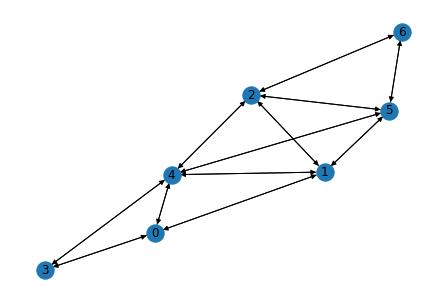

In [221]:
nx.draw(G, with_labels = True)

### Continue in new notebook: Wilson's algorithm-script-test-2